<a href="https://colab.research.google.com/github/danielobed/Portfolio/blob/main/%5BW6W7W8_AUG22%5D_Daniel_Obed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

#User Data

In [ ]:
sheet_url = 'https://drive.google.com/file/d/11PIWh0ksBPsnC6Hm-idkid0nPUfMkeEf/view'
sheet_url_trf = 'https://drive.google.com/uc?id='+ sheet_url.split('/')[-2]
df_user = pd.read_csv(sheet_url_trf)
df_user

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


##Data Cleaning

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


In [ ]:
len(df_user)

14712

There are 14712 rows in user data, while there are 14712 rows non-null. Summary, there is no missing value

In [ ]:
df_user.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
dtype: int64


1.   There are 9108 users (62%) doesn't use referral_code_used (9108 users join independently without interference from other users)
2.   There is no missing value (NaN)




##Duplicate Data

In [ ]:
df_user.duplicated().sum()

0

There are no duplicated data

##Outlier

In [ ]:
df_user.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji


In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


Numeric data in user data only user_id and user_age, this data is not classify as an outlier

##Convert Type

In [ ]:
df_user['user_id'] = df_user['user_id'].astype(str)
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  object
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(1), object(7)
memory usage: 919.6+ KB


Change user_id Data type from integer to string

In [ ]:
df_user['user_age'] = df_user['user_age'].astype(str)
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  object
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  object
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: object(8)
memory usage: 919.6+ KB


Change user_age data type from integer to string

In [ ]:
df_user_clean = df_user.copy()
df_user_clean['registration_import_datetime'] = pd.to_datetime(df_user_clean['registration_import_datetime']).dt.strftime('%Y/%m/%d')
df_user_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  object
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  object
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: object(8)
memory usage: 919.6+ KB


Change registration_import_datetime Data type from string to date with format 'yyyy-mm-dd'

In [ ]:
df_user_clean['registration_import_datetime'] = pd.to_datetime(df_user_clean['registration_import_datetime'])
df_user_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  object        
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 919.6+ KB


In [ ]:
df_user_clean

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


##Typo

In [ ]:
for i in df_user_clean.columns:
  print(i);
  unique_data = df_user_clean[i].value_counts()
  print(unique_data,'\n')

user_id
162882     1
4297940    1
4267551    1
4407058    1
4270595    1
          ..
3771510    1
3847659    1
3763751    1
3878306    1
4401986    1
Name: user_id, Length: 14712, dtype: int64 

registration_import_datetime
2021-10-17    272
2021-08-29    267
2021-09-26    258
2021-10-07    247
2021-10-04    247
             ... 
2021-08-14    113
2021-08-17    110
2021-08-21    110
2021-10-16     61
2021-10-27     44
Name: registration_import_datetime, Length: 87, dtype: int64 

user_gender
Male      8977
Female    5735
Name: user_gender, dtype: int64 

user_age
21    1192
20    1058
23    1031
19     972
22     963
24     901
25     792
18     771
26     744
27     668
28     605
29     553
30     458
31     415
32     346
33     280
17     268
34     262
35     262
36     229
37     194
38     166
39     162
42     143
41     138
40     129
43     107
44      90
49      82
46      81
45      80
48      75
47      68
51      58
52      57
50      48
54      47
53      38
55      34


There are no Typo, but we can simplify categories in the user occupation by changing PNS, Guru, TNI/Polisi, and Pensiunan to Others since they are not top 5 mode in the Data

In [ ]:
df_user_clean['user_occupation'] = df_user_clean['user_occupation'].replace(('PNS','Guru','TNI/Polisi','Pensiunan'),'Others')
df_user_clean

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15,Female,47,Others,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


#Daily User Balanced

In [ ]:
sheet_url1 = 'https://drive.google.com/file/d/1uq_iZE0fWIp8qdDa-AC9OXx3BlgzTir3/view'
sheet_url_trf1 = 'https://drive.google.com/uc?id='+ sheet_url1.split('/')[-2]
df_DUB = pd.read_csv(sheet_url_trf1)
df_DUB

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN


##Data Cleaning

In [ ]:
df_DUB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

In [ ]:
len(df_DUB)

158811

There are alot of NaN value (means no transaction).

We don't replace NaN to 0 here, because NaN value won't be calculated when finding outlier
source https://stackoverflow.com/questions/52171333/does-the-quantile-function-in-pandas-ignore-nan



In [ ]:
df_DUB.isna().sum()

user_id                                     0
date                                        0
Saham_AUM                               52519
Saham_invested_amount                   52519
Saham_transaction_amount                57972
Pasar_Uang_AUM                          27730
Pasar_Uang_invested_amount              27730
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_AUM                    52865
Pendapatan_Tetap_invested_amount        52865
Pendapatan_Tetap_transaction_amount     58314
Campuran_AUM                           153459
Campuran_invested_amount               153459
Campuran_transaction_amount            153694
dtype: int64

No Need to drop NaN value because NaN value in this data is 'No Transaction'

##Duplicate Data

In [ ]:
df_DUB.duplicated().sum()

0

There are no duplicated data

##Outlier

In [ ]:
df_DUB.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0


In [ ]:
df_DUB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

(3, 4)
(12,)


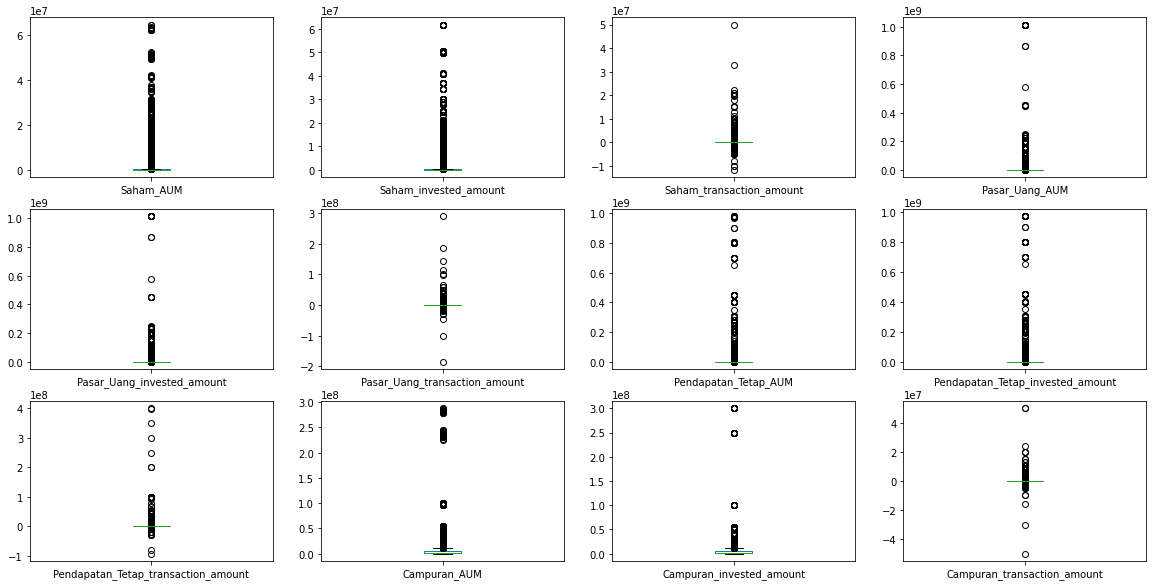

In [ ]:
Cols = ['Saham_AUM','Saham_invested_amount','Saham_transaction_amount','Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_transaction_amount','Campuran_AUM','Campuran_invested_amount','Campuran_transaction_amount']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,10))
axes_flatten = axes.flatten();

print(axes.shape);
print(axes_flatten.shape);

for i, el in enumerate(Cols):
    a = df_DUB.boxplot(el, ax=axes_flatten[i],grid=False)
plt.show()

Unable to conclude the outlier of the data, Outliers will be made after merging between User and DUB

##Convert Type

In [ ]:
df_DUB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

In [ ]:
df_DUB['user_id'] = df_DUB['user_id'].astype(str)
df_DUB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  object 
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

In [ ]:
df_DUB_clean = df_DUB.copy()
df_DUB_clean['date'] = pd.to_datetime(df_DUB_clean['date'])
df_DUB_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            106292 non-null  float64       
 3   Saham_invested_amount                106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

Change date Data type from string to date with format 'yyyy-mm-dd'

##Typo

There are no Typo in data transaction since all of the data created by system

#Merge

In [ ]:
df_user_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  object        
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 919.6+ KB


In [ ]:
df_DUB_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            106292 non-null  float64       
 3   Saham_invested_amount                106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

Both Data Frame has same Data Type in user_id

In [ ]:
merge = df_DUB_clean.merge(df_user_clean, how = 'left', on = 'user_id')
merge

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10132277.0,10000000.0,NaN,2021-08-24,Female,28,IRT,Rp 10 Juta - 50 Juta,NaN,Gaji
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10206945.0,10000000.0,0.0,2021-08-24,Female,28,IRT,Rp 10 Juta - 50 Juta,NaN,Gaji
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9956556.0,10000000.0,0.0,2021-08-24,Female,28,IRT,Rp 10 Juta - 50 Juta,NaN,Gaji
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9914858.0,10000000.0,0.0,2021-08-24,Female,28,IRT,Rp 10 Juta - 50 Juta,NaN,Gaji
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10016360.0,10000000.0,0.0,2021-08-24,Female,28,IRT,Rp 10 Juta - 50 Juta,NaN,Gaji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2021-09-28,Male,24,Others,< 10 Juta,used referral,Keuntungan Bisnis
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2021-09-28,Male,18,Pelajar,< 10 Juta,used referral,Tabungan
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,...,NaN,NaN,NaN,2021-09-28,Female,28,Swasta,Rp 10 Juta - 50 Juta,NaN,Dari Suami / istri
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,...,NaN,NaN,NaN,2021-09-28,Male,25,Swasta,Rp 10 Juta - 50 Juta,used referral,Gaji


##Data Transformation

###End Month of Period AUM and Invested Amount

In [ ]:
month = pd.to_datetime(merge['date']).dt.strftime('%Y/%m')
merge.insert(loc=2, column='year_month', value=month)

In [ ]:
df_data = merge.copy()
df_data['year_month'] = pd.to_datetime(df_data['year_month'])
df_end_month_period = df_data[(df_data['date']=='2021-08-31')| (df_data['date']=='2021-09-30')]
df_end_month_period

,user_id,date,year_month,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,...,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
1,50701,2021-08-31,2021-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10206945.0,10000000.0,0.0,2021-08-24,Female,28,IRT,Rp 10 Juta - 50 Juta,NaN,Gaji
23,50701,2021-09-30,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9943587.0,10000000.0,0.0,2021-08-24,Female,28,IRT,Rp 10 Juta - 50 Juta,NaN,Gaji
24,50961,2021-08-31,2021-08-01,716057.0,700000.0,NaN,100049.0,100000.0,NaN,200117.0,...,NaN,NaN,NaN,2021-08-20,Female,33,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
46,50961,2021-09-30,2021-09-01,2063909.0,2000000.0,300000.0,700603.0,700000.0,600000.0,1398998.0,...,NaN,NaN,NaN,2021-08-20,Female,33,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
52,53759,2021-08-31,2021-08-01,70839.0,70000.0,0.0,10006.0,10000.0,0.0,20066.0,...,NaN,NaN,NaN,2021-08-19,Male,29,Swasta,< 10 Juta,NaN,Gaji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,2021-09-01,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,2021-09-28,Male,24,Others,< 10 Juta,used referral,Keuntungan Bisnis
158807,4165132,2021-09-30,2021-09-01,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,...,NaN,NaN,NaN,2021-09-28,Male,18,Pelajar,< 10 Juta,used referral,Tabungan
158808,4165630,2021-09-30,2021-09-01,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,...,NaN,NaN,NaN,2021-09-28,Female,28,Swasta,Rp 10 Juta - 50 Juta,NaN,Dari Suami / istri
158809,4165704,2021-09-30,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,...,NaN,NaN,NaN,2021-09-28,Male,25,Swasta,Rp 10 Juta - 50 Juta,used referral,Gaji


###Monthly Transaction

In [ ]:
df_data_monthly = df_data.copy()
df_monthly = df_data_monthly[['user_id','year_month','Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount']]

df_monthly['freq_buy_saham'] = (df_monthly[['Saham_transaction_amount']] > 0) *1
df_monthly['freq_buy_pasar_uang'] = (df_monthly[['Pasar_Uang_transaction_amount']] > 0) *1
df_monthly['freq_buy_pendapatan_tetap'] = (df_monthly[['Pendapatan_Tetap_transaction_amount']] > 0) *1
df_monthly['freq_buy_campuran'] = (df_monthly[['Campuran_transaction_amount']] > 0) *1

df_monthly['freq_sell_saham'] = (df_monthly[['Saham_transaction_amount']] < 0) *1
df_monthly['freq_sell_pasar_uang'] = (df_monthly[['Pasar_Uang_transaction_amount']] < 0) *1
df_monthly['freq_sell_pendapatan_tetap'] = (df_monthly[['Pendapatan_Tetap_transaction_amount']] < 0) *1
df_monthly['freq_sell_campuran'] = (df_monthly[['Campuran_transaction_amount']] < 0) *1

df_monthly['buy_saham'] = np.where(df_monthly['Saham_transaction_amount']>0,df_monthly['Saham_transaction_amount'],0)
df_monthly['buy_pasar_uang'] = np.where(df_monthly['Pasar_Uang_transaction_amount']>0,df_monthly['Pasar_Uang_transaction_amount'],0)
df_monthly['buy_pendapatan_tetap'] = np.where(df_monthly['Pendapatan_Tetap_transaction_amount']>0,df_monthly['Pendapatan_Tetap_transaction_amount'],0)
df_monthly['buy_campuran'] = np.where(df_monthly['Campuran_transaction_amount']>0,df_monthly['Campuran_transaction_amount'],0)

df_monthly['sell_saham'] = np.where(df_monthly['Saham_transaction_amount']<0,df_monthly['Saham_transaction_amount'],0)
df_monthly['sell_pasar_uang'] = np.where(df_monthly['Pasar_Uang_transaction_amount']<0,df_monthly['Pasar_Uang_transaction_amount'],0)
df_monthly['sell_pendapatan_tetap'] = np.where(df_monthly['Pendapatan_Tetap_transaction_amount']<0,df_monthly['Pendapatan_Tetap_transaction_amount'],0)
df_monthly['sell_campuran'] = np.where(df_monthly['Campuran_transaction_amount']<0,df_monthly['Campuran_transaction_amount'],0)

df_monthly['net_saham'] = df_monthly['buy_saham'] + df_monthly['sell_saham']
df_monthly['net_pasar_uang'] = df_monthly['buy_pasar_uang'] + df_monthly['sell_pasar_uang']
df_monthly['net_pendapatan_tetap'] = df_monthly['buy_pendapatan_tetap'] + df_monthly['sell_pendapatan_tetap']
df_monthly['net_campuran'] = df_monthly['buy_campuran'] + df_monthly['sell_campuran']

df_monthly = df_monthly.iloc[:,np.r_[0,1,6:26]]
df_monthly.groupby(['user_id','year_month']).sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

freq_buy_saham  freq_buy_pasar_uang  \
user_id year_month                                        
1004326 2021-08-01               0                    0   
        2021-09-01               0                    0   
1005053 2021-09-01               0                    0   
1005165 2021-09-01               0                    0   
1018814 2021-08-01               0                    0   
...                            ...                  ...   
990466  2021-08-01               0                    0   
        2021-09-01               2                    2   
99245   2021-09-01               0                    0   
997938  2021-08-01               0                    0   
        2021-09-01               1                    2   

                    freq_buy_pendapatan_tetap  freq_buy_campuran  \
user_id year_month                                                 
1004326 2021-08-01                          0                  0   
        2021-09-01                          0                  0   
1005053 2021-09-01                          0                  0   
1005165 2021-09-01                          0                  0   
1018814 2021-08-01                          0                  0   
...                                       ...                ...   
990466  2021-08-01                          0                  0   
        2021-09-01                          2                  0   
99245   2021-09-01                          0                  0   
997938  2021-08-01                          0                  0   
        2021-09-01                          0                  0   

                    freq_sell_saham  freq_sell_pasar_uang  \
user_id year_month                                          
1004326 2021-08-01                0                     0   
        2021-09-01                0                     0   
1005053 2021-09-01                0                     0   
1005165 2021-09-01                0                     0   
1018814 2021-08-01                0                     0   
...                             ...                   ...   
990466  2021-08-01                0                     0   
        2021-09-01                0                     0   
99245   2021-09-01                0                     0   
997938  2021-08-01                0                     0   
        2021-09-01                0                     0   

                    freq_sell_pendapatan_tetap  freq_sell_campuran  buy_saham  \
user_id year_month                                                              
1004326 2021-08-01                           0                   0        0.0   
        2021-09-01                           0                   0        0.0   
1005053 2021-09-01                           0                   0        0.0   
1005165 2021-09-01                           0                   0        0.0   
1018814 2021-08-01                           0                   0        0.0   
...                                        ...                 ...        ...   
990466  2021-08-01                           0                   0        0.0   
        2021-09-01                           0                   0   770000.0   
99245   2021-09-01                           0                   0        0.0   
997938  2021-08-01                           0                   0        0.0   
        2021-09-01                           0                   0   100000.0   

                    buy_pasar_uang  buy_pendapatan_tetap  buy_campuran  \
user_id year_month                                                       
1004326 2021-08-01             0.0                   0.0           0.0   
        2021-09-01             0.0                   0.0           0.0   
1005053 2021-09-01             0.0                   0.0           0.0   
1005165 2021-09-01             0.0                   0.0           0.0   
1018814 2021-08-01             0.0                   0.0           0.0   
.

In [ ]:
df_monthly.groupby(['year_month']).sum()

,freq_buy_saham,freq_buy_pasar_uang,freq_buy_pendapatan_tetap,freq_buy_campuran,freq_sell_saham,freq_sell_pasar_uang,freq_sell_pendapatan_tetap,freq_sell_campuran,buy_saham,buy_pasar_uang,buy_pendapatan_tetap,buy_campuran,sell_saham,sell_pasar_uang,sell_pendapatan_tetap,sell_campuran,net_saham,net_pasar_uang,net_pendapatan_tetap,net_campuran
year_month,,,,,,,,,,,,,,,,,,,,
2021-08-01,694,987,962,39,477,461,368,15,3.055993e+08,9.657015e+08,1.773534e+09,188735000.0,-131248636.0,-383447182.0,-120088368.0,-106983207.0,174350703.0,5.822543e+08,1.653446e+09,81751793.0
2021-09-01,2777,3439,3124,92,1331,1549,1213,31,1.284747e+09,2.759937e+09,4.777623e+09,342692002.0,-329873390.0,-632932854.0,-650194280.0,-70694857.0,954873901.0,2.127004e+09,4.127429e+09,271997145.0


##Outlier

In [ ]:
df_latest_data = df_data[df_data['date']=='2021-09-30']
A = df_latest_data[df_latest_data['user_income_range']=='< 10 Juta']
B = df_latest_data[df_latest_data['user_income_range']=='Rp 10 Juta - 50 Juta']
C = df_latest_data[df_latest_data['user_income_range']=='> Rp 50 Juta - 100 Juta']
D = df_latest_data[df_latest_data['user_income_range']=='> Rp 100 Juta - 500 Juta']
E = df_latest_data[df_latest_data['user_income_range']=='> Rp 500 Juta - 1 Miliar']
F = df_latest_data[df_latest_data['user_income_range']=='> Rp 1 Miliar']

We use the latest data to show each user's current AUM

###Outlier Income Range < 10 Juta (A)

In [ ]:
#Outlier <10 Juta (A)
Q1_A3 = A['Saham_AUM'].quantile(0.25)
Q1_A6 = A['Pasar_Uang_AUM'].quantile(0.25)
Q1_A9 = A['Pendapatan_Tetap_AUM'].quantile(0.25)
Q1_A12 = A['Campuran_AUM'].quantile(0.25)

Q3_A3 = A['Saham_AUM'].quantile(0.75)
Q3_A6 = A['Pasar_Uang_AUM'].quantile(0.75)
Q3_A9 = A['Pendapatan_Tetap_AUM'].quantile(0.75)
Q3_A12 = A['Campuran_AUM'].quantile(0.75)

IQR_A3 = Q3_A3 - Q1_A3
IQR_A6 = Q3_A6 - Q1_A6
IQR_A9 = Q3_A9 - Q1_A9
IQR_A12 = Q3_A12 - Q1_A12

boxplot_min_A3 = Q1_A3 - 1.5 * IQR_A3
boxplot_min_A6 = Q1_A6 - 1.5 * IQR_A6
boxplot_min_A9 = Q1_A9 - 1.5 * IQR_A9
boxplot_min_A12 = Q1_A12 - 1.5 * IQR_A12

boxplot_max_A3 = Q1_A3 + 1.5 * IQR_A3
boxplot_max_A6 = Q1_A6 + 1.5 * IQR_A6
boxplot_max_A9 = Q1_A9 + 1.5 * IQR_A9
boxplot_max_A12 = Q1_A12 + 1.5 * IQR_A12

filter_AUM_min_A3 = A['Saham_AUM']<boxplot_min_A3
filter_AUM_min_A6 = A['Pasar_Uang_AUM']<boxplot_min_A6
filter_AUM_min_A9 = A['Pendapatan_Tetap_AUM']<boxplot_min_A9
filter_AUM_min_A12 = A['Campuran_AUM']<boxplot_min_A12
filter_AUM_min_A = (filter_AUM_min_A3|filter_AUM_min_A6|filter_AUM_min_A9|filter_AUM_min_A12)

filter_AUM_max_A3 = A['Saham_AUM']<boxplot_max_A3
filter_AUM_max_A6 = A['Pasar_Uang_AUM']<boxplot_max_A6
filter_AUM_max_A9 = A['Pendapatan_Tetap_AUM']<boxplot_max_A9
filter_AUM_max_A12 = A['Campuran_AUM']<boxplot_max_A12
filter_AUM_max_A = (filter_AUM_max_A3|filter_AUM_max_A6|filter_AUM_max_A9|filter_AUM_max_A12)


###Outlier Income Range Rp 10 Juta - 50 Juta (B)

In [ ]:
#Outlier Rp 10 Juta - 50 Juta (B)
Q1_B3 = B['Saham_AUM'].quantile(0.25)
Q1_B6 = B['Pasar_Uang_AUM'].quantile(0.25)
Q1_B9 = B['Pendapatan_Tetap_AUM'].quantile(0.25)
Q1_B12 = B['Campuran_AUM'].quantile(0.25)

Q3_B3 = B['Saham_AUM'].quantile(0.75)
Q3_B6 = B['Pasar_Uang_AUM'].quantile(0.75)
Q3_B9 = B['Pendapatan_Tetap_AUM'].quantile(0.75)
Q3_B12 = B['Campuran_AUM'].quantile(0.75)

IQR_B3 = Q3_B3 - Q1_B3
IQR_B6 = Q3_B6 - Q1_B6
IQR_B9 = Q3_B9 - Q1_B9
IQR_B12 = Q3_B12 - Q1_B12

boxplot_min_B3 = Q1_B3 - 1.5 * IQR_B3
boxplot_min_B6 = Q1_B6 - 1.5 * IQR_B6
boxplot_min_B9 = Q1_B9 - 1.5 * IQR_B9
boxplot_min_B12 = Q1_B12 - 1.5 * IQR_B12

boxplot_max_B3 = Q1_B3 + 1.5 * IQR_B3
boxplot_max_B6 = Q1_B6 + 1.5 * IQR_B6
boxplot_max_B9 = Q1_B9 + 1.5 * IQR_B9
boxplot_max_B12 = Q1_B12 + 1.5 * IQR_B12

filter_AUM_min_B3 = B['Saham_AUM']<boxplot_min_B3
filter_AUM_min_B6 = B['Pasar_Uang_AUM']<boxplot_min_B6
filter_AUM_min_B9 = B['Pendapatan_Tetap_AUM']<boxplot_min_B9
filter_AUM_min_B12 = B['Campuran_AUM']<boxplot_min_B12
filter_AUM_min_B = (filter_AUM_min_B3|filter_AUM_min_B6|filter_AUM_min_B9|filter_AUM_min_B12)

filter_AUM_max_B3 = B['Saham_AUM']<boxplot_max_B3
filter_AUM_max_B6 = B['Pasar_Uang_AUM']<boxplot_max_B6
filter_AUM_max_B9 = B['Pendapatan_Tetap_AUM']<boxplot_max_B9
filter_AUM_max_B12 = B['Campuran_AUM']<boxplot_max_B12
filter_AUM_max_B = (filter_AUM_max_B3|filter_AUM_max_B6|filter_AUM_max_B9|filter_AUM_max_B12)


###Outlier Income Range > Rp 50 Juta - 100 Juta (C)

In [ ]:
#Outlier > Rp 50 Juta - 100 Juta (C)
Q1_C3 = C['Saham_AUM'].quantile(0.25)
Q1_C6 = C['Pasar_Uang_AUM'].quantile(0.25)
Q1_C9 = C['Pendapatan_Tetap_AUM'].quantile(0.25)
Q1_C12 = C['Campuran_AUM'].quantile(0.25)

Q3_C3 = C['Saham_AUM'].quantile(0.75)
Q3_C6 = C['Pasar_Uang_AUM'].quantile(0.75)
Q3_C9 = C['Pendapatan_Tetap_AUM'].quantile(0.75)
Q3_C12 = C['Campuran_AUM'].quantile(0.75)

IQR_C3 = Q3_C3 - Q1_C3
IQR_C6 = Q3_C6 - Q1_C6
IQR_C9 = Q3_C9 - Q1_C9
IQR_C12 = Q3_C12 - Q1_C12

boxplot_min_C3 = Q1_C3 - 1.5 * IQR_C3
boxplot_min_C6 = Q1_C6 - 1.5 * IQR_C6
boxplot_min_C9 = Q1_C9 - 1.5 * IQR_C9
boxplot_min_C12 = Q1_C12 - 1.5 * IQR_C12

boxplot_max_C3 = Q1_C3 + 1.5 * IQR_C3
boxplot_max_C6 = Q1_C6 + 1.5 * IQR_C6
boxplot_max_C9 = Q1_C9 + 1.5 * IQR_C9
boxplot_max_C12 = Q1_C12 + 1.5 * IQR_C12

filter_AUM_min_C3 = C['Saham_AUM']<boxplot_min_C3
filter_AUM_min_C6 = C['Pasar_Uang_AUM']<boxplot_min_C6
filter_AUM_min_C9 = C['Pendapatan_Tetap_AUM']<boxplot_min_C9
filter_AUM_min_C12 = C['Campuran_AUM']<boxplot_min_C12
filter_AUM_min_C = (filter_AUM_min_C3|filter_AUM_min_C6|filter_AUM_min_C9|filter_AUM_min_C12)

filter_AUM_max_C3 = C['Saham_AUM']<boxplot_max_C3
filter_AUM_max_C6 = C['Pasar_Uang_AUM']<boxplot_max_C6
filter_AUM_max_C9 = C['Pendapatan_Tetap_AUM']<boxplot_max_C9
filter_AUM_max_C12 = C['Campuran_AUM']<boxplot_max_C12
filter_AUM_max_C = (filter_AUM_max_C3|filter_AUM_max_C6|filter_AUM_max_C9|filter_AUM_max_C12)


###Outlier Income Range > Rp 100 Juta - 500 Juta (D)

In [ ]:
#Outlier > Rp 100 Juta - 500 Juta (D)
Q1_D3 = D['Saham_AUM'].quantile(0.25)
Q1_D6 = D['Pasar_Uang_AUM'].quantile(0.25)
Q1_D9 = D['Pendapatan_Tetap_AUM'].quantile(0.25)
Q1_D12 = D['Campuran_AUM'].quantile(0.25)

Q3_D3 = D['Saham_AUM'].quantile(0.75)
Q3_D6 = D['Pasar_Uang_AUM'].quantile(0.75)
Q3_D9 = D['Pendapatan_Tetap_AUM'].quantile(0.75)
Q3_D12 = D['Campuran_AUM'].quantile(0.75)

IQR_D3 = Q3_D3 - Q1_D3
IQR_D6 = Q3_D6 - Q1_D6
IQR_D9 = Q3_D9 - Q1_D9
IQR_D12 = Q3_D12 - Q1_D12

boxplot_min_D3 = Q1_D3 - 1.5 * IQR_D3
boxplot_min_D6 = Q1_D6 - 1.5 * IQR_D6
boxplot_min_D9 = Q1_D9 - 1.5 * IQR_D9
boxplot_min_D12 = Q1_D12 - 1.5 * IQR_D12

boxplot_max_D3 = Q1_D3 + 1.5 * IQR_D3
boxplot_max_D6 = Q1_D6 + 1.5 * IQR_D6
boxplot_max_D9 = Q1_D9 + 1.5 * IQR_D9
boxplot_max_D12 = Q1_D12 + 1.5 * IQR_D12

filter_AUM_min_D3 = D['Saham_AUM']<boxplot_min_D3
filter_AUM_min_D6 = D['Pasar_Uang_AUM']<boxplot_min_D6
filter_AUM_min_D9 = D['Pendapatan_Tetap_AUM']<boxplot_min_D9
filter_AUM_min_D12 = D['Campuran_AUM']<boxplot_min_D12
filter_AUM_min_D = (filter_AUM_min_D3|filter_AUM_min_D6|filter_AUM_min_D9|filter_AUM_min_D12)

filter_AUM_max_D3 = D['Saham_AUM']<boxplot_max_D3
filter_AUM_max_D6 = D['Pasar_Uang_AUM']<boxplot_max_D6
filter_AUM_max_D9 = D['Pendapatan_Tetap_AUM']<boxplot_max_D9
filter_AUM_max_D12 = D['Campuran_AUM']<boxplot_max_D12
filter_AUM_max_D = (filter_AUM_max_D3|filter_AUM_max_D6|filter_AUM_max_D9|filter_AUM_max_D12)


###Outlier Income Range > Rp 500 Juta - 1 Miliar (E)

In [ ]:
#Outlier > Rp 500 Juta - 1 Miliar (E)
Q1_E3 = E['Saham_AUM'].quantile(0.25)
Q1_E6 = E['Pasar_Uang_AUM'].quantile(0.25)
Q1_E9 = E['Pendapatan_Tetap_AUM'].quantile(0.25)
Q1_E12 = E['Campuran_AUM'].quantile(0.25)

Q3_E3 = E['Saham_AUM'].quantile(0.75)
Q3_E6 = E['Pasar_Uang_AUM'].quantile(0.75)
Q3_E9 = E['Pendapatan_Tetap_AUM'].quantile(0.75)
Q3_E12 = E['Campuran_AUM'].quantile(0.75)

IQR_E3 = Q3_E3 - Q1_E3
IQR_E6 = Q3_E6 - Q1_E6
IQR_E9 = Q3_E9 - Q1_E9
IQR_E12 = Q3_E12 - Q1_E12

boxplot_min_E3 = Q1_E3 - 1.5 * IQR_E3
boxplot_min_E6 = Q1_E6 - 1.5 * IQR_E6
boxplot_min_E9 = Q1_E9 - 1.5 * IQR_E9
boxplot_min_E12 = Q1_E12 - 1.5 * IQR_E12

boxplot_max_E3 = Q1_E3 + 1.5 * IQR_E3
boxplot_max_E6 = Q1_E6 + 1.5 * IQR_E6
boxplot_max_E9 = Q1_E9 + 1.5 * IQR_E9
boxplot_max_E12 = Q1_E12 + 1.5 * IQR_E12

filter_AUM_min_E3 = E['Saham_AUM']<boxplot_min_E3
filter_AUM_min_E6 = E['Pasar_Uang_AUM']<boxplot_min_E6
filter_AUM_min_E9 = E['Pendapatan_Tetap_AUM']<boxplot_min_E9
filter_AUM_min_E12 = E['Campuran_AUM']<boxplot_min_E12
filter_AUM_min_E = (filter_AUM_min_E3|filter_AUM_min_E6|filter_AUM_min_E9|filter_AUM_min_E12)

filter_AUM_max_E3 = E['Saham_AUM']<boxplot_max_E3
filter_AUM_max_E6 = E['Pasar_Uang_AUM']<boxplot_max_E6
filter_AUM_max_E9 = E['Pendapatan_Tetap_AUM']<boxplot_max_E9
filter_AUM_max_E12 = E['Campuran_AUM']<boxplot_max_E12
filter_AUM_max_E = (filter_AUM_max_E3|filter_AUM_max_E6|filter_AUM_max_E9|filter_AUM_max_E12)


###Outlier Income Range > Rp 1 Miliar (F)

In [ ]:
#Outlier > Rp 1 Miliar (F)
Q1_F3 = F['Saham_AUM'].quantile(0.25)
Q1_F6 = F['Pasar_Uang_AUM'].quantile(0.25)
Q1_F9 = F['Pendapatan_Tetap_AUM'].quantile(0.25)
Q1_F12 = F['Campuran_AUM'].quantile(0.25)

Q3_F3 = F['Saham_AUM'].quantile(0.75)
Q3_F6 = F['Pasar_Uang_AUM'].quantile(0.75)
Q3_F9 = F['Pendapatan_Tetap_AUM'].quantile(0.75)
Q3_F12 = F['Campuran_AUM'].quantile(0.75)

IQR_F3 = Q3_F3 - Q1_F3
IQR_F6 = Q3_F6 - Q1_F6
IQR_F9 = Q3_F9 - Q1_F9
IQR_F12 = Q3_F12 - Q1_F12

boxplot_min_F3 = Q1_F3 - 1.5 * IQR_F3
boxplot_min_F6 = Q1_F6 - 1.5 * IQR_F6
boxplot_min_F9 = Q1_F9 - 1.5 * IQR_F9
boxplot_min_F12 = Q1_F12 - 1.5 * IQR_F12

boxplot_max_F3 = Q1_F3 + 1.5 * IQR_F3
boxplot_max_F6 = Q1_F6 + 1.5 * IQR_F6
boxplot_max_F9 = Q1_F9 + 1.5 * IQR_F9
boxplot_max_F12 = Q1_F12 + 1.5 * IQR_F12

filter_AUM_min_F3 = F['Saham_AUM']<boxplot_min_F3
filter_AUM_min_F6 = F['Pasar_Uang_AUM']<boxplot_min_F6
filter_AUM_min_F9 = F['Pendapatan_Tetap_AUM']<boxplot_min_F9
filter_AUM_min_F12 = F['Campuran_AUM']<boxplot_min_F12
filter_AUM_min_F = (filter_AUM_min_F3|filter_AUM_min_F6|filter_AUM_min_F9|filter_AUM_min_F12)

filter_AUM_max_F3 = F['Saham_AUM']<boxplot_max_F3
filter_AUM_max_F6 = F['Pasar_Uang_AUM']<boxplot_max_F6
filter_AUM_max_F9 = F['Pendapatan_Tetap_AUM']<boxplot_max_F9
filter_AUM_max_F12 = F['Campuran_AUM']<boxplot_max_F12
filter_AUM_max_F = (filter_AUM_max_F3|filter_AUM_max_F6|filter_AUM_max_F9|filter_AUM_max_F12)


###Filtered Out Outlier

In [ ]:
df_non_outlier = df_latest_data[~(filter_AUM_min_A|filter_AUM_max_A|filter_AUM_min_B|filter_AUM_max_B|filter_AUM_min_C|filter_AUM_max_C|filter_AUM_min_D|filter_AUM_max_D|filter_AUM_min_E|filter_AUM_max_E|filter_AUM_min_F|filter_AUM_max_F)]
df_non_outlier = df_non_outlier.fillna(0)
df_non_outlier

,user_id,date,year_month,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,...,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
23,50701,2021-09-30,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9943587.0,10000000.0,0.0,2021-08-24,Female,28,IRT,Rp 10 Juta - 50 Juta,0,Gaji
99,54759,2021-09-30,2021-09-01,0.0,0.0,0.0,12049049.0,12000000.0,2000000.0,0.0,...,0.0,0.0,0.0,2021-08-11,Male,27,Swasta,> Rp 100 Juta - 500 Juta,0,Gaji
374,99245,2021-09-30,2021-09-01,0.0,0.0,0.0,500940.0,500000.0,0.0,501670.0,...,0.0,0.0,0.0,2021-09-09,Male,25,Pelajar,< 10 Juta,0,Gaji
569,135357,2021-09-30,2021-09-01,0.0,0.0,0.0,150263.0,150000.0,0.0,0.0,...,0.0,0.0,0.0,2021-09-14,Female,45,IRT,< 10 Juta,0,Keuntungan Bisnis
655,140185,2021-09-30,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,399652.0,...,0.0,0.0,0.0,2021-09-14,Female,20,Pelajar,< 10 Juta,used referral,Undian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158685,4154216,2021-09-30,2021-09-01,0.0,0.0,0.0,500125.0,500000.0,0.0,0.0,...,0.0,0.0,0.0,2021-09-27,Female,29,IRT,> Rp 50 Juta - 100 Juta,0,Gaji
158729,4156674,2021-09-30,2021-09-01,0.0,0.0,0.0,999577.0,1000000.0,0.0,0.0,...,0.0,0.0,0.0,2021-09-27,Female,25,Others,> Rp 50 Juta - 100 Juta,0,Gaji
158735,4157097,2021-09-30,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,997190.0,...,0.0,0.0,0.0,2021-09-27,Male,21,Pelajar,Rp 10 Juta - 50 Juta,0,Dari Orang Tua / Anak
158744,4157513,2021-09-30,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,5002304.0,...,0.0,0.0,0.0,2021-09-27,Female,51,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis


In [ ]:
outlier_user = len(df_latest_data) - len(df_non_outlier)
total_user = len(df_latest_data)
print(outlier_user)
print(total_user)
print(outlier_user/total_user)

7252
8277
0.8761628609399541


There are 7252 (88%) users outlier by AUM, we can't remove outlier because too many data to be removed.

In [ ]:
df_data = df_data.fillna(0)
df_data

,user_id,date,year_month,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,...,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,50701,2021-08-30,2021-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10132277.0,10000000.0,0.0,2021-08-24,Female,28,IRT,Rp 10 Juta - 50 Juta,0,Gaji
1,50701,2021-08-31,2021-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10206945.0,10000000.0,0.0,2021-08-24,Female,28,IRT,Rp 10 Juta - 50 Juta,0,Gaji
2,50701,2021-09-01,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9956556.0,10000000.0,0.0,2021-08-24,Female,28,IRT,Rp 10 Juta - 50 Juta,0,Gaji
3,50701,2021-09-02,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9914858.0,10000000.0,0.0,2021-08-24,Female,28,IRT,Rp 10 Juta - 50 Juta,0,Gaji
4,50701,2021-09-03,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10016360.0,10000000.0,0.0,2021-08-24,Female,28,IRT,Rp 10 Juta - 50 Juta,0,Gaji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2021-09-28,Male,24,Others,< 10 Juta,used referral,Keuntungan Bisnis
158807,4165132,2021-09-30,2021-09-01,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,...,0.0,0.0,0.0,2021-09-28,Male,18,Pelajar,< 10 Juta,used referral,Tabungan
158808,4165630,2021-09-30,2021-09-01,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,...,0.0,0.0,0.0,2021-09-28,Female,28,Swasta,Rp 10 Juta - 50 Juta,0,Dari Suami / istri
158809,4165704,2021-09-30,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,...,0.0,0.0,0.0,2021-09-28,Male,25,Swasta,Rp 10 Juta - 50 Juta,used referral,Gaji


#EDA

##Descriptive Statistics

In [ ]:
user_eda = df_latest_data[['user_id','user_income_range']].describe()
user_eda

,user_id,user_income_range
count,8277,8277
unique,8277,6
top,50701,< 10 Juta
freq,1,3527


In [ ]:
df_eda_describe = df_latest_data[Cols].describe()
df_eda_describe.iloc[:,[0,1,3,4,6,7,9,10]]

,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount
count,5.453000e+03,5.453000e+03,6.808000e+03,6.808000e+03,5.449000e+03,5.449000e+03,2.350000e+02,2.350000e+02
mean,5.272648e+05,5.106874e+05,9.551138e+05,9.523759e+05,1.919636e+06,1.915184e+06,6.468854e+06,6.677031e+06
std,2.570258e+06,2.488666e+06,1.501036e+07,1.495981e+07,2.274341e+07,2.260974e+07,2.135972e+07,2.247071e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,9.980000e+03,1.000000e+04,2.004130e+05,2.000000e+05
50%,5.258900e+04,5.000000e+04,2.000900e+04,2.000000e+04,6.487400e+04,6.500000e+04,1.002897e+06,1.000000e+06
75%,2.167930e+05,2.100000e+05,1.102350e+05,1.100000e+05,2.516380e+05,2.500000e+05,4.821164e+06,5.000000e+06
max,6.445433e+07,6.184000e+07,1.016171e+09,1.012200e+09,9.797670e+08,9.700000e+08,2.827965e+08,3.000000e+08


##User

In [ ]:
df_user_clean['user_id'].value_counts().sum()

14712

There are 14712 users

###User Occupation

([<matplotlib.patches.Wedge at 0x7fe851e21610>,
 [Text(-0.12446133807430954, 1.0929361259125587, 'Pelajar'),
  Text(-0.6632839127775226, -0.8775274645562611, 'Swasta'),
  Text(0.5109074981725705, -0.974152723299096, 'Others'),
  Text(0.9881649147130139, -0.48324952284531236, 'IRT'),
  Text(1.0910436488461446, -0.1400848182798234, 'Pengusaha')],
 [Text(-0.06788800258598701, 0.5961469777704865, '53.6%\n7887'),
  Text(-0.3617912251513759, -0.47865134430341505, '22.2%\n3263'),
  Text(0.27867681718503845, -0.5313560308904159, '13.8%\n2030'),
  Text(0.5389990443889167, -0.2635906488247158, '6.3%\n934'),
  Text(0.5951147175524424, -0.07640990087990367, '4.1%\n598')])

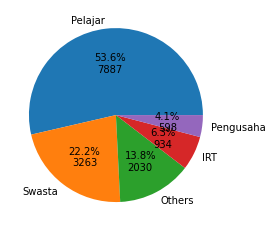

In [ ]:
eda_occupation = df_user_clean['user_occupation'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, eda_occupation*x/100)

plt.pie(df_user_clean['user_occupation'].value_counts().values, labels=df_user_clean['user_occupation'].value_counts().index, autopct=fmt)

###Referral Code

([<matplotlib.patches.Wedge at 0x7fe853293650>,
 [Text(-0.4020000198046972, 1.0239120978272613, 'no referral'),
  Text(0.4019999239391263, -1.023912135465215, 'used referral')],
 [Text(-0.21927273807528935, 0.5584975079057788, '61.9%\n9108'),
  Text(0.21927268578497797, -0.5584975284355718, '38.1%\n5604')])

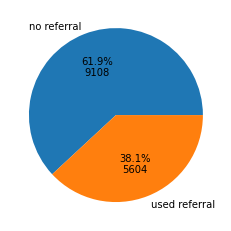

In [ ]:
df_referral = df_user_clean.copy()
df_referral['referral_code_used'] = df_referral['referral_code_used'].fillna('no referral')
eda_referral = df_referral['referral_code_used'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, eda_referral*x/100)

plt.pie(df_referral['referral_code_used'].value_counts().values, labels=df_referral['referral_code_used'].value_counts().index, autopct=fmt)

###Gender

([<matplotlib.patches.Wedge at 0x7fe851f40050>,
 [Text(-0.37320395527862815, 1.03475543379312, 'Male'),
  Text(0.3732039552786285, -1.0347554337931197, 'Female')],
 [Text(-0.2035657937883426, 0.5644120547962472, '61.0%\n8977'),
  Text(0.20356579378834277, -0.5644120547962471, '39.0%\n5735')])

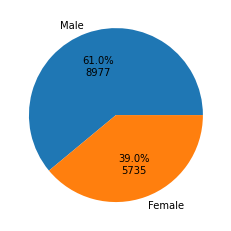

In [ ]:
total_gender = df_user_clean['user_gender'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total_gender*x/100)

plt.pie(df_user_clean['user_gender'].value_counts().values, labels=df_user_clean['user_gender'].value_counts().index, autopct=fmt)

###Income Range

([<matplotlib.patches.Wedge at 0x7fe85952b190>,
 [Text(0.25167079428876704, 1.0708229598313912, '< 10 Juta'),
  Text(-0.9280250358080009, -0.5905671282026785, 'Rp 10 Juta - 50 Juta'),
  Text(0.5605437316658974, -0.9464622152469007, '> Rp 50 Juta - 100 Juta'),
  Text(1.0547416686901068, -0.31228194364837886, '> Rp 100 Juta - 500 Juta'),
  Text(1.0994799863139961, -0.03381951648050039, '> Rp 500 Juta - 1 Miliar'),
  Text(1.0999817159667453, -0.0063422818334341515, '> Rp 1 Miliar')],
 [Text(0.13727497870296382, 0.5840852508171225, '42.7%\n6275'),
  Text(-0.5061954740770913, -0.3221275244741883, '32.7%\n4816'),
  Text(0.3057511263632167, -0.5162521174074003, '16.2%\n2390'),
  Text(0.5753136374673309, -0.17033560562638847, '7.6%\n1114'),
  Text(0.5997163561712706, -0.01844700898936385, '0.6%\n90'),
  Text(0.5999900268909519, -0.003459426454600446, '0.2%\n27')])

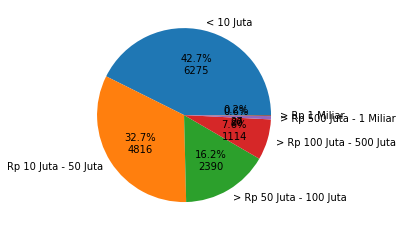

In [ ]:
eda_income_range = df_user_clean['user_income_range'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, eda_income_range*x/100)

plt.pie(df_user_clean['user_income_range'].value_counts().values, labels=df_user_clean['user_income_range'].value_counts().index, autopct=fmt)

##AUM

###AUM per user

In [ ]:
df_AUM = df_latest_data[['user_id','Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM']]
df_mean = df_AUM.groupby('user_id').mean()
df_mean.mean()

Saham_AUM               5.272648e+05
Pasar_Uang_AUM          9.551138e+05
Pendapatan_Tetap_AUM    1.919636e+06
Campuran_AUM            6.468854e+06
dtype: float64

In [ ]:
df_AUM.drop('user_id', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


###AUM Share

In [ ]:
total_AUM = df_AUM.sum().sum()
df_AUM = df_AUM.sum().div(total_AUM)
df_AUM

Saham_AUM               0.134619
Pasar_Uang_AUM          0.304451
Pendapatan_Tetap_AUM    0.489754
Campuran_AUM            0.071177
dtype: float64

Share AUM of each type of mutual fund

##User Transaction

###Timeseries transaction of each mutual fund

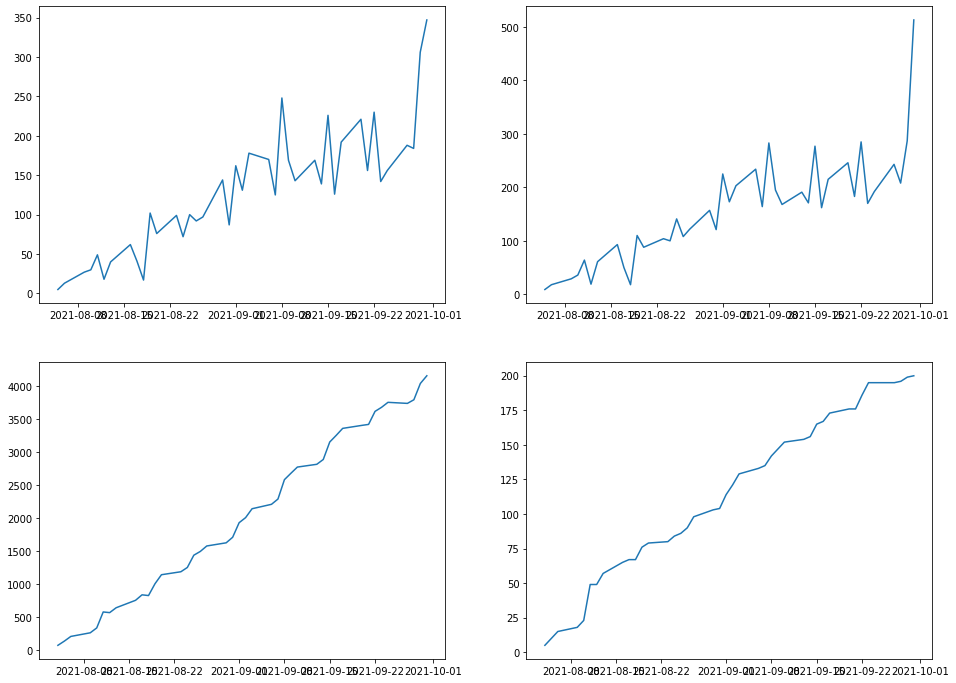

In [ ]:
saham_not_0 = df_data[df_data['Saham_transaction_amount']!=0]
pasar_not_0 = df_data[df_data['Pasar_Uang_transaction_amount']!=0]
pendapatan_not_0 = df_data[df_data['Pendapatan_Tetap_AUM']!=0]
campuran_not_0 = df_data[df_data['Campuran_AUM']!=0]

daily_saham_trans = saham_not_0.groupby(['date'])['Saham_transaction_amount'].count()
daily_pasar_trans = pasar_not_0.groupby(['date'])['Pasar_Uang_transaction_amount'].count()
daily_pendapatan_trans = pendapatan_not_0.groupby(['date'])['Pendapatan_Tetap_AUM'].count()
daily_campuran_trans = campuran_not_0.groupby(['date'])['Campuran_AUM'].count()

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(daily_saham_trans)
ax2.plot(daily_pasar_trans)
ax3.plot(daily_pendapatan_trans)
ax4.plot(daily_campuran_trans)

Time series for each mutual fund transaction increases

###Transaction in any given day

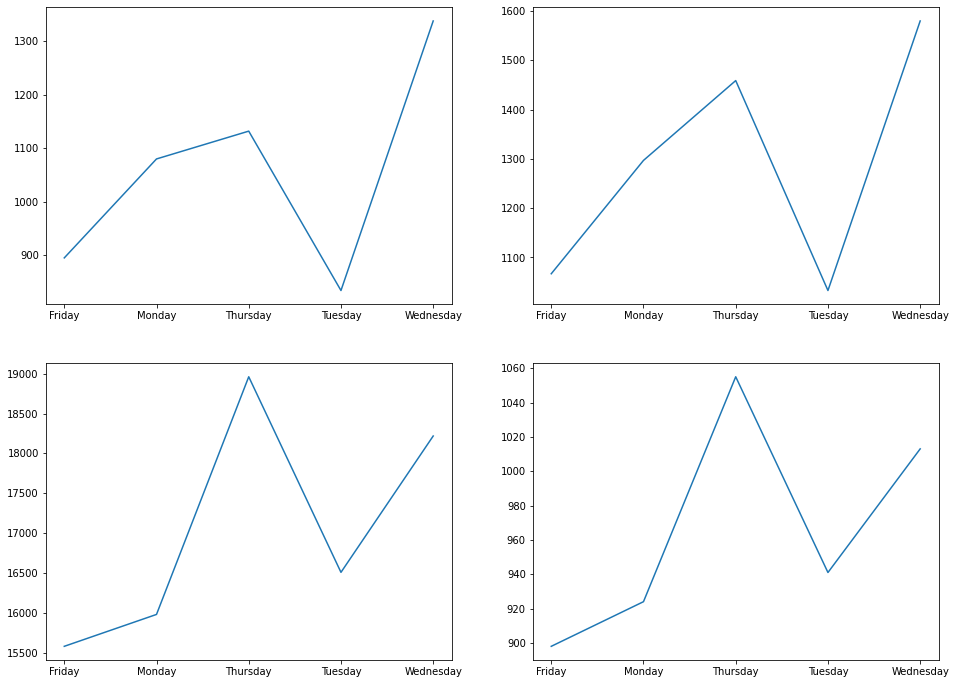

In [ ]:
weekday = df_data['date']
weekday = weekday.dt.day_name()
df_data['weekday'] = weekday

saham_not_0 = df_data[df_data['Saham_transaction_amount']!=0]
pasar_not_0 = df_data[df_data['Pasar_Uang_transaction_amount']!=0]
pendapatan_not_0 = df_data[df_data['Pendapatan_Tetap_AUM']!=0]
campuran_not_0 = df_data[df_data['Campuran_AUM']!=0]

weekday_saham_trans = saham_not_0.groupby(['weekday'])['Saham_transaction_amount'].count()
weekday_pasar_trans = pasar_not_0.groupby(['weekday'])['Pasar_Uang_transaction_amount'].count()
weekday_pendapatan_trans = pendapatan_not_0.groupby(['weekday'])['Pendapatan_Tetap_AUM'].count()
weekday_campuran_trans = campuran_not_0.groupby(['weekday'])['Campuran_AUM'].count()

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(weekday_saham_trans)
ax2.plot(weekday_pasar_trans)
ax3.plot(weekday_pendapatan_trans)
ax4.plot(weekday_campuran_trans)

Summary
1. The lowest saham transaction occured on Tuesday 
2. The highest saham transaction occured on Wednesday
3. The lowest pasar uang transaction occured on Tuesday 
4. The highest pasar uang transaction occured on Wednesday 
5. The lowest pendapatan tetap transaction occured on Friday
6. The highest pendapatan tetap transaction occured on Thursday
7. The lowest campuran transaction occured on Friday
8. The highest campuran transaction occured on Thursday

###Average monthly buy/sell

In [ ]:
saham_not_0 = df_data[df_data['Saham_transaction_amount']!=0]
pasar_not_0 = df_data[df_data['Pasar_Uang_transaction_amount']!=0]
pendapatan_not_0 = df_data[df_data['Pendapatan_Tetap_AUM']!=0]
campuran_not_0 = df_data[df_data['Campuran_AUM']!=0]

avg_saham = saham_not_0.groupby(['year_month','user_id']).mean()
avg_saham = avg_saham['Saham_transaction_amount']
avg_pasar = pasar_not_0.groupby(['user_id','year_month']).mean()
avg_pasar = avg_pasar['Pasar_Uang_transaction_amount']
avg_pendapatan = pendapatan_not_0.groupby(['user_id','year_month']).mean()
avg_pendapatan = avg_pendapatan['Pendapatan_Tetap_AUM']
avg_campuran = campuran_not_0.groupby(['user_id','year_month']).mean()
avg_campuran = avg_campuran['Campuran_AUM']

avg_monthly = pd.merge(
    pd.merge(
        pd.merge(avg_saham,avg_pasar, how = 'outer', on=('user_id','year_month')),
        avg_pendapatan, how = 'outer', on = ('user_id','year_month')),
        avg_campuran, how = 'outer', on = ('user_id','year_month'))
avg_monthly = avg_monthly.fillna(0)
avg_monthly

Saham_transaction_amount  Pasar_Uang_transaction_amount  \
user_id year_month                                                            
1109220 2021-08-01                  -10000.0                      -150000.0   
1111674 2021-08-01                       0.0                            0.0   
1119474 2021-08-01                   30000.0                        10000.0   
1131019 2021-08-01                  -90000.0                       -60000.0   
1134964 2021-08-01                   45000.0                       -10000.0   
...                                      ...                            ...   
50701   2021-09-01                       0.0                            0.0   
71229   2021-08-01                       0.0                            0.0   
        2021-09-01                       0.0                            0.0   
796039  2021-08-01                       0.0                            0.0   
        2021-09-01                       0.0                            0.0   

                    Pendapatan_Tetap_AUM  Campuran_AUM  
user_id year_month                                      
1109220 2021-08-01          40006.000000  0.000000e+00  
1111674 2021-08-01              0.000000  0.000000e+00  
1119474 2021-08-01          98187.533333  0.000000e+00  
1131019 2021-08-01         350827.100000  0.000000e+00  
1134964 2021-08-01         100338.200000  0.000000e+00  
...                                  ...           ...  
50701   2021-09-01              0.000000  9.941737e+06  
71229   2021-08-01              0.000000  2.588378e+06  
        2021-09-01              0.000000  6.441332e+05  
796039  2021-08-01              0.000000  9.882092e+05  
        2021-09-01              0.000000  9.759580e+05  

[8578 rows x 4 columns]

##Behavioral Difference

###By Gender

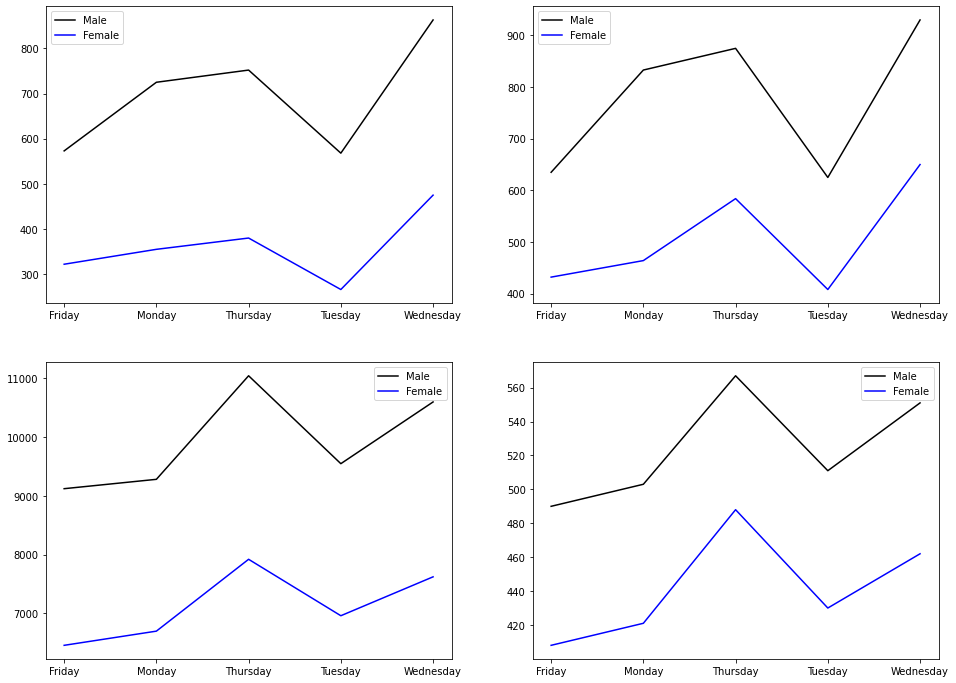

In [ ]:
saham_male = saham_not_0[saham_not_0['user_gender']=='Male']
pasar_male = pasar_not_0[pasar_not_0['user_gender']=='Male']
pendapatan_male = pendapatan_not_0[pendapatan_not_0['user_gender']=='Male']
campuran_male = campuran_not_0[campuran_not_0['user_gender']=='Male']

saham_female = saham_not_0[saham_not_0['user_gender']=='Female']
pasar_female = pasar_not_0[pasar_not_0['user_gender']=='Female']
pendapatan_female = pendapatan_not_0[pendapatan_not_0['user_gender']=='Female']
campuran_female = campuran_not_0[campuran_not_0['user_gender']=='Female']

weekday_saham_trans_male = saham_male.groupby(['weekday'])['Saham_transaction_amount'].count()
weekday_pasar_trans_male = pasar_male.groupby(['weekday'])['Pasar_Uang_transaction_amount'].count()
weekday_pendapatan_trans_male = pendapatan_male.groupby(['weekday'])['Pendapatan_Tetap_AUM'].count()
weekday_campuran_trans_male = campuran_male.groupby(['weekday'])['Campuran_AUM'].count()

weekday_saham_trans_female = saham_female.groupby(['weekday'])['Saham_transaction_amount'].count()
weekday_pasar_trans_female = pasar_female.groupby(['weekday'])['Pasar_Uang_transaction_amount'].count()
weekday_pendapatan_trans_female = pendapatan_female.groupby(['weekday'])['Pendapatan_Tetap_AUM'].count()
weekday_campuran_trans_female = campuran_female.groupby(['weekday'])['Campuran_AUM'].count()

fig = plt.figure(figsize=(16, 12))


ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

#Male
ax1.plot(weekday_saham_trans_male,'k',label='Male')
ax2.plot(weekday_pasar_trans_male,'k',label='Male')
ax3.plot(weekday_pendapatan_trans_male,'k',label='Male')
ax4.plot(weekday_campuran_trans_male,'k',label='Male')

#Female
ax1.plot(weekday_saham_trans_female,'b',label='Female')
ax2.plot(weekday_pasar_trans_female,'b',label='Female')
ax3.plot(weekday_pendapatan_trans_female,'b',label='Female')
ax4.plot(weekday_campuran_trans_female,'b',label='Female')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

1. Male have more transactions than female in all fund mutual
2. In general, Male and Female have same behavior in transaction in any given day

###By Occupation

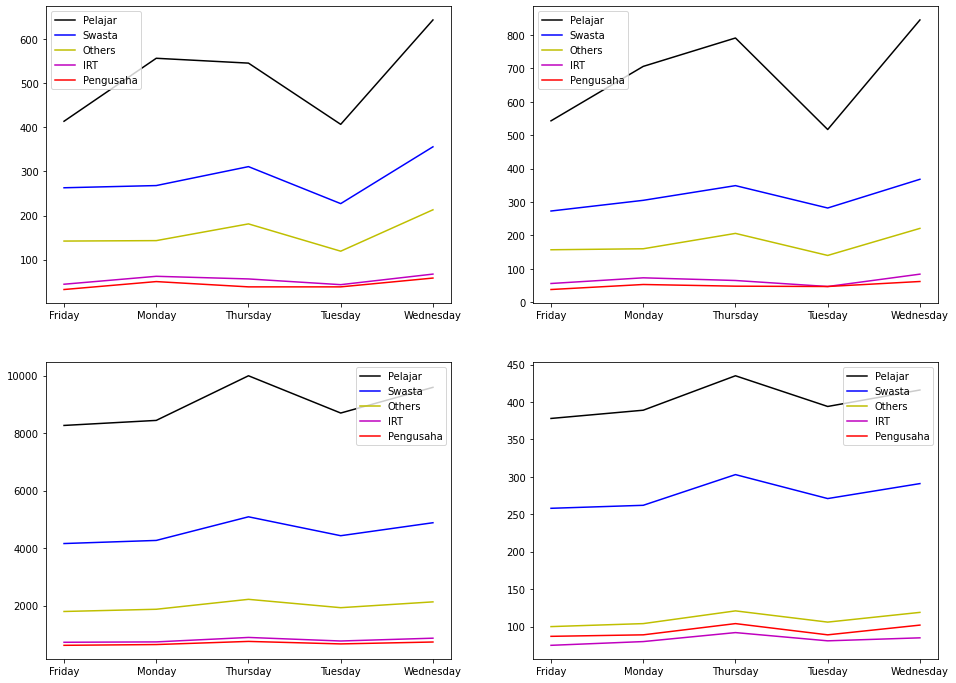

In [ ]:
#filter user occupation
saham_pelajar = saham_not_0[saham_not_0['user_occupation']=='Pelajar']
saham_swasta = saham_not_0[saham_not_0['user_occupation']=='Swasta']
saham_others = saham_not_0[saham_not_0['user_occupation']=='Others']
saham_irt = saham_not_0[saham_not_0['user_occupation']=='IRT']
saham_pengusaha = saham_not_0[saham_not_0['user_occupation']=='Pengusaha']

pasar_pelajar = pasar_not_0[pasar_not_0['user_occupation']=='Pelajar']
pasar_swasta = pasar_not_0[pasar_not_0['user_occupation']=='Swasta']
pasar_others = pasar_not_0[pasar_not_0['user_occupation']=='Others']
pasar_irt = pasar_not_0[pasar_not_0['user_occupation']=='IRT']
pasar_pengusaha = pasar_not_0[pasar_not_0['user_occupation']=='Pengusaha']

pendapatan_pelajar = pendapatan_not_0[pendapatan_not_0['user_occupation']=='Pelajar']
pendapatan_swasta = pendapatan_not_0[pendapatan_not_0['user_occupation']=='Swasta']
pendapatan_others = pendapatan_not_0[pendapatan_not_0['user_occupation']=='Others']
pendapatan_irt = pendapatan_not_0[pendapatan_not_0['user_occupation']=='IRT']
pendapatan_pengusaha = pendapatan_not_0[pendapatan_not_0['user_occupation']=='Pengusaha']

campuran_pelajar = campuran_not_0[campuran_not_0['user_occupation']=='Pelajar']
campuran_swasta = campuran_not_0[campuran_not_0['user_occupation']=='Swasta']
campuran_others = campuran_not_0[campuran_not_0['user_occupation']=='Others']
campuran_irt = campuran_not_0[campuran_not_0['user_occupation']=='IRT']
campuran_pengusaha = campuran_not_0[campuran_not_0['user_occupation']=='Pengusaha']

#groupby weekday each occupation
weekday_saham_trans_pelajar = saham_pelajar.groupby(['weekday'])['Saham_transaction_amount'].count()
weekday_pasar_trans_pelajar = pasar_pelajar.groupby(['weekday'])['Pasar_Uang_transaction_amount'].count()
weekday_pendapatan_trans_pelajar = pendapatan_pelajar.groupby(['weekday'])['Pendapatan_Tetap_AUM'].count()
weekday_campuran_trans_pelajar = campuran_pelajar.groupby(['weekday'])['Campuran_AUM'].count()

weekday_saham_trans_swasta = saham_swasta.groupby(['weekday'])['Saham_transaction_amount'].count()
weekday_pasar_trans_swasta = pasar_swasta.groupby(['weekday'])['Pasar_Uang_transaction_amount'].count()
weekday_pendapatan_trans_swasta = pendapatan_swasta.groupby(['weekday'])['Pendapatan_Tetap_AUM'].count()
weekday_campuran_trans_swasta = campuran_swasta.groupby(['weekday'])['Campuran_AUM'].count()

weekday_saham_trans_others = saham_others.groupby(['weekday'])['Saham_transaction_amount'].count()
weekday_pasar_trans_others = pasar_others.groupby(['weekday'])['Pasar_Uang_transaction_amount'].count()
weekday_pendapatan_trans_others = pendapatan_others.groupby(['weekday'])['Pendapatan_Tetap_AUM'].count()
weekday_campuran_trans_others = campuran_others.groupby(['weekday'])['Campuran_AUM'].count()

weekday_saham_trans_irt = saham_irt.groupby(['weekday'])['Saham_transaction_amount'].count()
weekday_pasar_trans_irt = pasar_irt.groupby(['weekday'])['Pasar_Uang_transaction_amount'].count()
weekday_pendapatan_trans_irt = pendapatan_irt.groupby(['weekday'])['Pendapatan_Tetap_AUM'].count()
weekday_campuran_trans_irt = campuran_irt.groupby(['weekday'])['Campuran_AUM'].count()

weekday_saham_trans_pengusaha = saham_pengusaha.groupby(['weekday'])['Saham_transaction_amount'].count()
weekday_pasar_trans_pengusaha = pasar_pengusaha.groupby(['weekday'])['Pasar_Uang_transaction_amount'].count()
weekday_pendapatan_trans_pengusaha = pendapatan_pengusaha.groupby(['weekday'])['Pendapatan_Tetap_AUM'].count()
weekday_campuran_trans_pengusaha = campuran_pengusaha.groupby(['weekday'])['Campuran_AUM'].count()

fig = plt.figure(figsize=(16, 12))


ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

#Pelajar
ax1.plot(weekday_saham_trans_pelajar,'k',label='Pelajar')
ax2.plot(weekday_pasar_trans_pelajar,'k',label='Pelajar')
ax3.plot(weekday_pendapatan_trans_pelajar,'k',label='Pelajar')
ax4.plot(weekday_campuran_trans_pelajar,'k',label='Pelajar')

#Swasta
ax1.plot(weekday_saham_trans_swasta,'b',label='Swasta')
ax2.plot(weekday_pasar_trans_swasta,'b',label='Swasta')
ax3.plot(weekday_pendapatan_trans_swasta,'b',label='Swasta')
ax4.plot(weekday_campuran_trans_swasta,'b',label='Swasta')

#Others
ax1.plot(weekday_saham_trans_others,'y',label='Others')
ax2.plot(weekday_pasar_trans_others,'y',label='Others')
ax3.plot(weekday_pendapatan_trans_others,'y',label='Others')
ax4.plot(weekday_campuran_trans_others,'y',label='Others')

#IRT
ax1.plot(weekday_saham_trans_irt,'m',label='IRT')
ax2.plot(weekday_pasar_trans_irt,'m',label='IRT')
ax3.plot(weekday_pendapatan_trans_irt,'m',label='IRT')
ax4.plot(weekday_campuran_trans_irt,'m',label='IRT')

#Pengusaha
ax1.plot(weekday_saham_trans_pengusaha,'r',label='Pengusaha')
ax2.plot(weekday_pasar_trans_pengusaha,'r',label='Pengusaha')
ax3.plot(weekday_pendapatan_trans_pengusaha,'r',label='Pengusaha')
ax4.plot(weekday_campuran_trans_pengusaha,'r',label='Pengusaha')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

1. Pelajar have more transactions than the others occupation in all fund mutual
2. In general, all occupation have same behavior in transaction in any given day

###By Level of Income

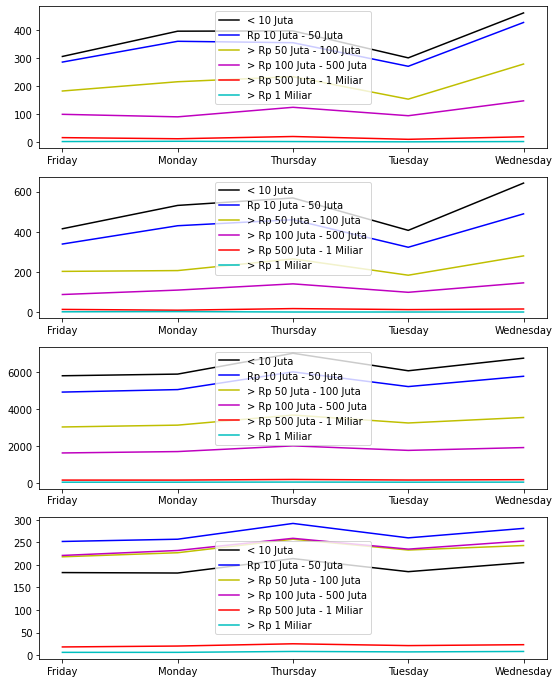

In [ ]:
#filter user income range
saham_income1 = saham_not_0[saham_not_0['user_income_range']=='< 10 Juta']
saham_income2 = saham_not_0[saham_not_0['user_income_range']=='Rp 10 Juta - 50 Juta']
saham_income3 = saham_not_0[saham_not_0['user_income_range']=='> Rp 50 Juta - 100 Juta']
saham_income4 = saham_not_0[saham_not_0['user_income_range']=='> Rp 100 Juta - 500 Juta']
saham_income5 = saham_not_0[saham_not_0['user_income_range']=='> Rp 500 Juta - 1 Miliar']
saham_income6 = saham_not_0[saham_not_0['user_income_range']=='> Rp 1 Miliar']

pasar_income1 = pasar_not_0[pasar_not_0['user_income_range']=='< 10 Juta']
pasar_income2 = pasar_not_0[pasar_not_0['user_income_range']=='Rp 10 Juta - 50 Juta']
pasar_income3 = pasar_not_0[pasar_not_0['user_income_range']=='> Rp 50 Juta - 100 Juta']
pasar_income4 = pasar_not_0[pasar_not_0['user_income_range']=='> Rp 100 Juta - 500 Juta']
pasar_income5 = pasar_not_0[pasar_not_0['user_income_range']=='> Rp 500 Juta - 1 Miliar']
pasar_income6 = pasar_not_0[pasar_not_0['user_income_range']=='> Rp 1 Miliar']

pendapatan_income1 = pendapatan_not_0[pendapatan_not_0['user_income_range']=='< 10 Juta']
pendapatan_income2 = pendapatan_not_0[pendapatan_not_0['user_income_range']=='Rp 10 Juta - 50 Juta']
pendapatan_income3 = pendapatan_not_0[pendapatan_not_0['user_income_range']=='> Rp 50 Juta - 100 Juta']
pendapatan_income4 = pendapatan_not_0[pendapatan_not_0['user_income_range']=='> Rp 100 Juta - 500 Juta']
pendapatan_income5 = pendapatan_not_0[pendapatan_not_0['user_income_range']=='> Rp 500 Juta - 1 Miliar']
pendapatan_income6 = pendapatan_not_0[pendapatan_not_0['user_income_range']=='> Rp 1 Miliar']

campuran_income1 = campuran_not_0[campuran_not_0['user_income_range']=='< 10 Juta']
campuran_income2 = campuran_not_0[campuran_not_0['user_income_range']=='Rp 10 Juta - 50 Juta']
campuran_income3 = campuran_not_0[campuran_not_0['user_income_range']=='> Rp 50 Juta - 100 Juta']
campuran_income4 = campuran_not_0[campuran_not_0['user_income_range']=='> Rp 100 Juta - 500 Juta']
campuran_income5 = campuran_not_0[campuran_not_0['user_income_range']=='> Rp 500 Juta - 1 Miliar']
campuran_income6 = campuran_not_0[campuran_not_0['user_income_range']=='> Rp 1 Miliar']

#groupby weekday each income range
weekday_saham_trans_income1 = saham_income1.groupby(['weekday'])['Saham_transaction_amount'].count()
weekday_pasar_trans_income1 = pasar_income1.groupby(['weekday'])['Pasar_Uang_transaction_amount'].count()
weekday_pendapatan_trans_income1 = pendapatan_income1.groupby(['weekday'])['Pendapatan_Tetap_AUM'].count()
weekday_campuran_trans_income1 = campuran_income1.groupby(['weekday'])['Campuran_AUM'].count()

weekday_saham_trans_income2 = saham_income2.groupby(['weekday'])['Saham_transaction_amount'].count()
weekday_pasar_trans_income2 = pasar_income2.groupby(['weekday'])['Pasar_Uang_transaction_amount'].count()
weekday_pendapatan_trans_income2 = pendapatan_income2.groupby(['weekday'])['Pendapatan_Tetap_AUM'].count()
weekday_campuran_trans_income2 = campuran_income2.groupby(['weekday'])['Campuran_AUM'].count()

weekday_saham_trans_income3 = saham_income3.groupby(['weekday'])['Saham_transaction_amount'].count()
weekday_pasar_trans_income3 = pasar_income3.groupby(['weekday'])['Pasar_Uang_transaction_amount'].count()
weekday_pendapatan_trans_income3 = pendapatan_income3.groupby(['weekday'])['Pendapatan_Tetap_AUM'].count()
weekday_campuran_trans_income3 = campuran_income3.groupby(['weekday'])['Campuran_AUM'].count()

weekday_saham_trans_income4 = saham_income4.groupby(['weekday'])['Saham_transaction_amount'].count()
weekday_pasar_trans_income4 = pasar_income4.groupby(['weekday'])['Pasar_Uang_transaction_amount'].count()
weekday_pendapatan_trans_income4 = pendapatan_income4.groupby(['weekday'])['Pendapatan_Tetap_AUM'].count()
weekday_campuran_trans_income4 = campuran_income4.groupby(['weekday'])['Campuran_AUM'].count()

weekday_saham_trans_income5 = saham_income5.groupby(['weekday'])['Saham_transaction_amount'].count()
weekday_pasar_trans_income5 = pasar_income5.groupby(['weekday'])['Pasar_Uang_transaction_amount'].count()
weekday_pendapatan_trans_income5 = pendapatan_income5.groupby(['weekday'])['Pendapatan_Tetap_AUM'].count()
weekday_campuran_trans_income5 = campuran_income5.groupby(['weekday'])['Campuran_AUM'].count()

weekday_saham_trans_income6 = saham_income6.groupby(['weekday'])['Saham_transaction_amount'].count()
weekday_pasar_trans_income6 = pasar_income6.groupby(['weekday'])['Pasar_Uang_transaction_amount'].count()
weekday_pendapatan_trans_income6 = pendapatan_income6.groupby(['weekday'])['Pendapatan_Tetap_AUM'].count()
weekday_campuran_trans_income6 = campuran_income6.groupby(['weekday'])['Campuran_AUM'].count()

fig = plt.figure(figsize=(20, 12))


ax1 = fig.add_subplot(4, 2, 1)
ax2 = fig.add_subplot(4, 2, 3)
ax3 = fig.add_subplot(4, 2, 5)
ax4 = fig.add_subplot(4, 2, 7)


#< 10 Juta
ax1.plot(weekday_saham_trans_income1,'k',label='< 10 Juta')
ax2.plot(weekday_pasar_trans_income1,'k',label='< 10 Juta')
ax3.plot(weekday_pendapatan_trans_income1,'k',label='< 10 Juta')
ax4.plot(weekday_campuran_trans_income1,'k',label='< 10 Juta')

#Rp 10 Juta - 50 Juta
ax1.plot(weekday_saham_trans_income2,'b',label='Rp 10 Juta - 50 Juta')
ax2.plot(weekday_pasar_trans_income2,'b',label='Rp 10 Juta - 50 Juta')
ax3.plot(weekday_pendapatan_trans_income2,'b',label='Rp 10 Juta - 50 Juta')
ax4.plot(weekday_campuran_trans_income2,'b',label='Rp 10 Juta - 50 Juta')

#> Rp 50 Juta - 100 Juta
ax1.plot(weekday_saham_trans_income3,'y',label='> Rp 50 Juta - 100 Juta')
ax2.plot(weekday_pasar_trans_income3,'y',label='> Rp 50 Juta - 100 Juta')
ax3.plot(weekday_pendapatan_trans_income3,'y',label='> Rp 50 Juta - 100 Juta')
ax4.plot(weekday_campuran_trans_income3,'y',label='> Rp 50 Juta - 100 Juta')

#> Rp 100 Juta - 500 Juta
ax1.plot(weekday_saham_trans_income4,'m',label='> Rp 100 Juta - 500 Juta')
ax2.plot(weekday_pasar_trans_income4,'m',label='> Rp 100 Juta - 500 Juta')
ax3.plot(weekday_pendapatan_trans_income4,'m',label='> Rp 100 Juta - 500 Juta')
ax4.plot(weekday_campuran_trans_income4,'m',label='> Rp 100 Juta - 500 Juta')

#> Rp 500 Juta - 1 Miliar
ax1.plot(weekday_saham_trans_income5,'r',label='> Rp 500 Juta - 1 Miliar')
ax2.plot(weekday_pasar_trans_income5,'r',label='> Rp 500 Juta - 1 Miliar')
ax3.plot(weekday_pendapatan_trans_income5,'r',label='> Rp 500 Juta - 1 Miliar')
ax4.plot(weekday_campuran_trans_income5,'r',label='> Rp 500 Juta - 1 Miliar')

#> Rp 1 Miliar
ax1.plot(weekday_saham_trans_income6,'c',label='> Rp 1 Miliar')
ax2.plot(weekday_pasar_trans_income6,'c',label='> Rp 1 Miliar')
ax3.plot(weekday_pendapatan_trans_income6,'c',label='> Rp 1 Miliar')
ax4.plot(weekday_campuran_trans_income6,'c',label='> Rp 1 Miliar')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

1. Most of all mutual funds, the highest transactions are users with incomes range <10 juta, except users with incomes range with range Rp 10 Juta - 50 Juta have the highest transaction in campuran fund
2. Users with income range > Rp 100 Juta - 500 Juta have different trend transaction in any given day in saham and pasar uang mutual fund

##Average Current Profit of Each User

In [ ]:
df_latest_data = df_latest_data.fillna(0)

total_all_aum = (df_latest_data['Saham_AUM'] + df_latest_data['Pasar_Uang_AUM'] + df_latest_data['Pendapatan_Tetap_AUM'] + df_latest_data['Campuran_AUM'])
total_all_invested = (df_latest_data['Saham_invested_amount'] + df_latest_data['Pasar_Uang_invested_amount'] + df_latest_data['Pendapatan_Tetap_invested_amount'] + df_latest_data['Campuran_invested_amount'])

df_latest_data['profit/loss'] = (total_all_aum - total_all_invested)/total_all_invested
df_latest_data.iloc[:,[0,3,4,6,7,9,10,12,13,22]]

,user_id,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount,profit/loss
23,50701,0.0,0.0,0.0,0.0,0.0,0.0,9943587.0,10000000.0,-0.005641
46,50961,2063909.0,2000000.0,700603.0,700000.0,1398998.0,1400000.0,0.0,0.0,0.015490
74,53759,73179.0,70000.0,10027.0,10000.0,20109.0,20000.0,0.0,0.0,0.033150
99,54759,0.0,0.0,12049049.0,12000000.0,0.0,0.0,0.0,0.0,0.004087
136,61414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
158806,4165020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
158807,4165132,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.000100
158808,4165630,41625.0,40000.0,10001.0,10000.0,49869.0,50000.0,0.0,0.0,0.014950
158809,4165704,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,-0.001300


#Trend

##Trend of Transaction

###Daily Trend

In [ ]:
saham_not_0 = df_data[df_data['Saham_transaction_amount']!=0]
pasar_not_0 = df_data[df_data['Pasar_Uang_transaction_amount']!=0]
pendapatan_not_0 = df_data[df_data['Pendapatan_Tetap_transaction_amount']!=0]
campuran_not_0 = df_data[df_data['Campuran_transaction_amount']!=0]

daily_saham_trans = saham_not_0.groupby(['date'])['Saham_transaction_amount'].count().reset_index(name='count')
daily_pasar_trans = pasar_not_0.groupby(['date'])['Pasar_Uang_transaction_amount'].count().reset_index(name='count')
daily_pendapatan_trans = pendapatan_not_0.groupby(['date'])['Pendapatan_Tetap_transaction_amount'].count().reset_index(name='count')
daily_campuran_trans = campuran_not_0.groupby(['date'])['Campuran_transaction_amount'].count().reset_index(name='count')

####Trend of Saham Transaction (Daily)

<Figure size 1440x864 with 0 Axes>

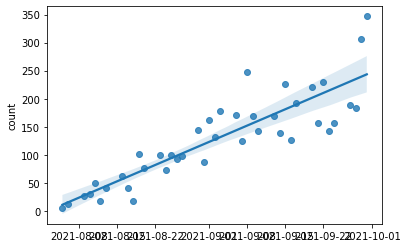

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(daily_saham_trans['date'])

sns.regplot(x=ax.xaxis.convert_units(daily_saham_trans['date']), y=daily_saham_trans['count'])

####Trend of Pasar Uang Transaction (Daily)

<Figure size 1440x864 with 0 Axes>

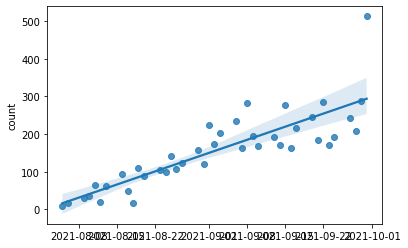

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(daily_pasar_trans['date'])

sns.regplot(x=ax.xaxis.convert_units(daily_pasar_trans['date']), y=daily_pasar_trans['count'])

####Trend of Pendapatan Tetap Transaction (Daily)

<Figure size 1440x864 with 0 Axes>

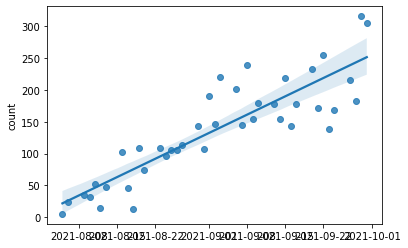

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(daily_pendapatan_trans['date'])

sns.regplot(x=ax.xaxis.convert_units(daily_pendapatan_trans['date']), y=daily_pendapatan_trans['count'])

####Trend of Campuran Transaction (Daily)

<Figure size 1440x864 with 0 Axes>

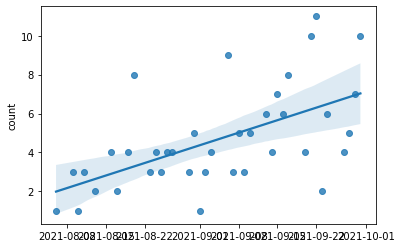

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(daily_campuran_trans['date'])

sns.regplot(x=ax.xaxis.convert_units(daily_campuran_trans['date']), y=daily_campuran_trans['count'])

All mutual fund transactions trends are increasing. This trend is good because more transactions represet a growing company

###Weekly Trend

In [ ]:
saham_not_0['date'] = pd.to_datetime(saham_not_0['date']) - pd.to_timedelta(7, unit='d')
pasar_not_0['date'] = pd.to_datetime(pasar_not_0['date']) - pd.to_timedelta(7, unit='d')
pendapatan_not_0['date'] = pd.to_datetime(pendapatan_not_0['date']) - pd.to_timedelta(7, unit='d')
campuran_not_0['date'] = pd.to_datetime(campuran_not_0['date']) - pd.to_timedelta(7, unit='d')

weekly_trans_saham = saham_not_0.groupby([pd.Grouper(key='date', freq='W')])['Saham_transaction_amount'].count().reset_index(name='count')
weekly_trans_pasar = pasar_not_0.groupby([pd.Grouper(key='date', freq='W')])['Pasar_Uang_transaction_amount'].count().reset_index(name='count')
weekly_trans_pendapatan = pendapatan_not_0.groupby([pd.Grouper(key='date', freq='W')])['Pendapatan_Tetap_transaction_amount'].count().reset_index(name='count')
weekly_trans_campuran = campuran_not_0.groupby([pd.Grouper(key='date', freq='W')])['Campuran_transaction_amount'].count().reset_index(name='count')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

####Trend of Saham Transaction (Weekly)

<Figure size 1440x864 with 0 Axes>

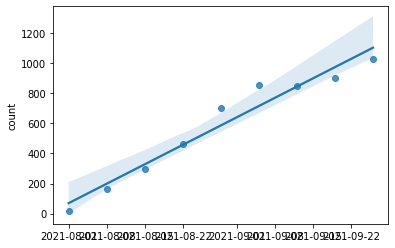

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(weekly_trans_saham['date'])

sns.regplot(x=ax.xaxis.convert_units(weekly_trans_saham['date']), y=weekly_trans_saham['count'])

####Trend of Pasar Uang (Weekly)

<Figure size 1440x864 with 0 Axes>

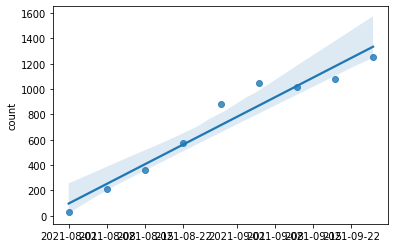

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(weekly_trans_pasar['date'])

sns.regplot(x=ax.xaxis.convert_units(weekly_trans_pasar['date']), y=weekly_trans_pasar['count'])

####Trend of Pendapatan (Weekly)

<Figure size 1440x864 with 0 Axes>

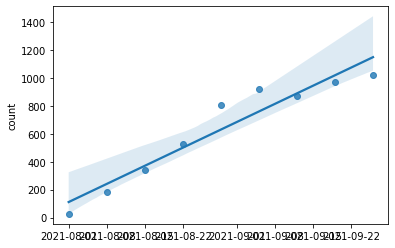

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(weekly_trans_pendapatan['date'])

sns.regplot(x=ax.xaxis.convert_units(weekly_trans_pendapatan['date']), y=weekly_trans_pendapatan['count'])

####Trend of Campuran (Weekly)

<Figure size 1440x864 with 0 Axes>

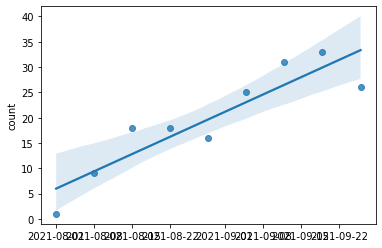

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(weekly_trans_campuran['date'])

sns.regplot(x=ax.xaxis.convert_units(weekly_trans_campuran['date']), y=weekly_trans_campuran['count'])

Same like daily trend, all of mutual fund have same trend (Growing)

###Monthly Trend

In [ ]:
saham_not_0 = df_data[df_data['Saham_transaction_amount']!=0]
pasar_not_0 = df_data[df_data['Pasar_Uang_transaction_amount']!=0]
pendapatan_not_0 = df_data[df_data['Pendapatan_Tetap_transaction_amount']!=0]
campuran_not_0 = df_data[df_data['Campuran_transaction_amount']!=0]

monthly_saham_trans = saham_not_0.groupby(['year_month'])['Saham_transaction_amount'].count().reset_index(name='count')
monthly_pasar_trans = pasar_not_0.groupby(['year_month'])['Pasar_Uang_transaction_amount'].count().reset_index(name='count')
monthly_pendapatan_trans = pendapatan_not_0.groupby(['year_month'])['Pendapatan_Tetap_transaction_amount'].count().reset_index(name='count')
monthly_campuran_trans = campuran_not_0.groupby(['year_month'])['Campuran_transaction_amount'].count().reset_index(name='count')

####Trend of Saham Transaction (Monthly)

<Figure size 1440x864 with 0 Axes>

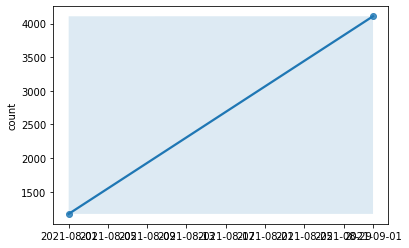

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(monthly_saham_trans['year_month'])

sns.regplot(x=ax.xaxis.convert_units(monthly_saham_trans['year_month']), y=monthly_saham_trans['count'])

####Trend of Pasar Uang Transaction (Monthly)

<Figure size 1440x864 with 0 Axes>

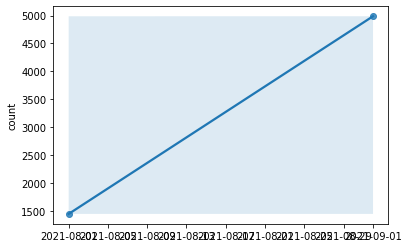

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(monthly_pasar_trans['year_month'])

sns.regplot(x=ax.xaxis.convert_units(monthly_pasar_trans['year_month']), y=monthly_pasar_trans['count'])

####Trend of Pendapatan Tetap Transaction (Monthly)

<Figure size 1440x864 with 0 Axes>

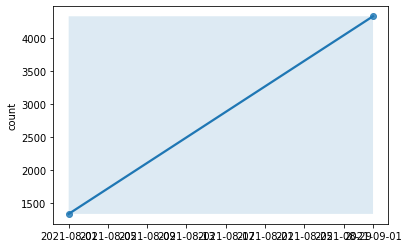

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(monthly_pendapatan_trans['year_month'])

sns.regplot(x=ax.xaxis.convert_units(monthly_pendapatan_trans['year_month']), y=monthly_pendapatan_trans['count'])

####Trend of Campuran Transaction (Monthly)

<Figure size 1440x864 with 0 Axes>

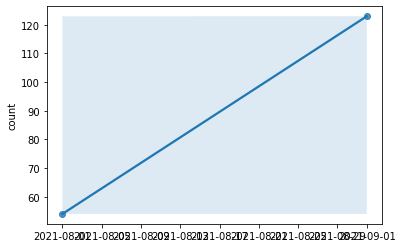

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(monthly_campuran_trans['year_month'])

sns.regplot(x=ax.xaxis.convert_units(monthly_campuran_trans['year_month']), y=monthly_campuran_trans['count'])

Same like daily and weekly trend, all mutual funds are increasing

##Trend of Balance

###Daily Trend

####Trend of Saham AUM (Daily)

In [ ]:
daily_saham_AUM = df_data.groupby(['date'])['Saham_AUM'].mean().reset_index(name='total_aum')
daily_pasar_AUM = df_data.groupby(['date'])['Pasar_Uang_AUM'].mean().reset_index(name='total_aum')
daily_pendapatan_AUM = df_data.groupby(['date'])['Pendapatan_Tetap_AUM'].mean().reset_index(name='total_aum')
daily_campuran_AUM = df_data.groupby(['date'])['Campuran_AUM'].mean().reset_index(name='total_aum')

<Figure size 1440x864 with 0 Axes>

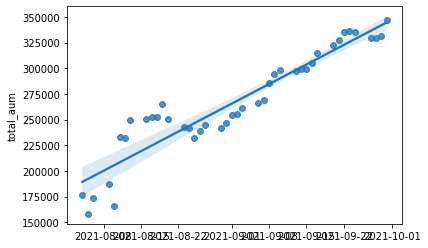

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(daily_saham_AUM['date'])

sns.regplot(x=ax.xaxis.convert_units(daily_saham_AUM['date']), y=daily_saham_AUM['total_aum'])

####Trend of Pasar Uang AUM (Daily)

<Figure size 1440x864 with 0 Axes>

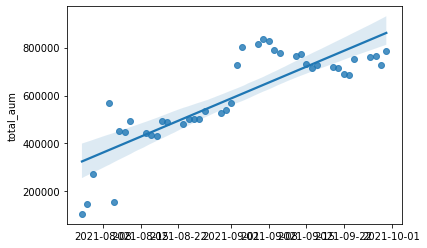

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(daily_pasar_AUM['date'])

sns.regplot(x=ax.xaxis.convert_units(daily_pasar_AUM['date']), y=daily_pasar_AUM['total_aum'])

####Trend of Pendapatan Tetap AUM (Daily)

<Figure size 1440x864 with 0 Axes>

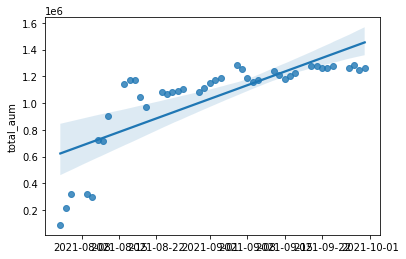

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(daily_pendapatan_AUM['date'])

sns.regplot(x=ax.xaxis.convert_units(daily_pendapatan_AUM['date']), y=daily_pendapatan_AUM['total_aum'])

####Trend of Campuran AUM (Daily)

<Figure size 1440x864 with 0 Axes>

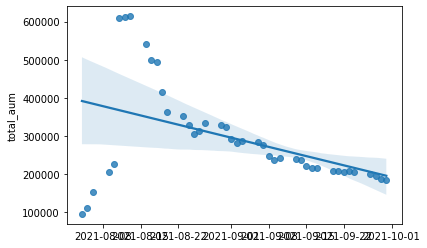

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(daily_campuran_AUM['date'])

sns.regplot(x=ax.xaxis.convert_units(daily_campuran_AUM['date']), y=daily_campuran_AUM['total_aum'])

Daily trend of Balance of all mutual funds are increasing, except Campuran is Decreasing

###Weekly Trend

In [ ]:
weekly_saham_aum = saham_not_0.groupby([pd.Grouper(key='date', freq='W')])['Saham_AUM'].mean().reset_index(name='total_aum')
weekly_pasar_aum = pasar_not_0.groupby([pd.Grouper(key='date', freq='W')])['Pasar_Uang_AUM'].mean().reset_index(name='total_aum')
weekly_pendapatan_aum = pendapatan_not_0.groupby([pd.Grouper(key='date', freq='W')])['Pendapatan_Tetap_AUM'].mean().reset_index(name='total_aum')
weekly_campuran_aum = campuran_not_0.groupby([pd.Grouper(key='date', freq='W')])['Campuran_AUM'].mean().reset_index(name='total_aum')

####Trend of Saham AUM (Weekly)

<Figure size 1440x864 with 0 Axes>

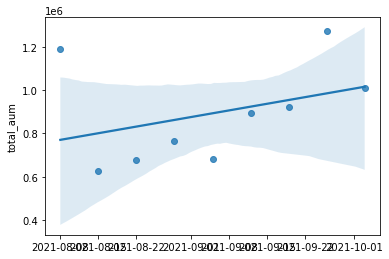

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(weekly_saham_aum['date'])

sns.regplot(x=ax.xaxis.convert_units(weekly_saham_aum['date']), y=weekly_saham_aum['total_aum'])

####Trend of Pasar Uang AUM (Weekly)

<Figure size 1440x864 with 0 Axes>

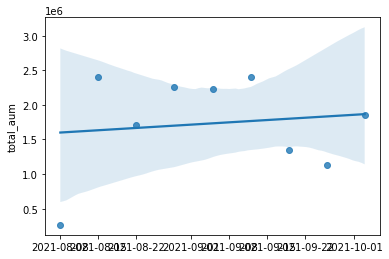

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(weekly_pasar_aum['date'])

sns.regplot(x=ax.xaxis.convert_units(weekly_pasar_aum['date']), y=weekly_pasar_aum['total_aum'])

####Trend of Pendapatan Tetap AUM (Weekly)

<Figure size 1440x864 with 0 Axes>

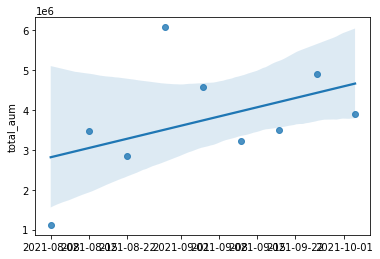

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(weekly_pendapatan_aum['date'])

sns.regplot(x=ax.xaxis.convert_units(weekly_pendapatan_aum['date']), y=weekly_pendapatan_aum['total_aum'])

####Trend of Campuran AUM (Weekly)

<Figure size 1440x864 with 0 Axes>

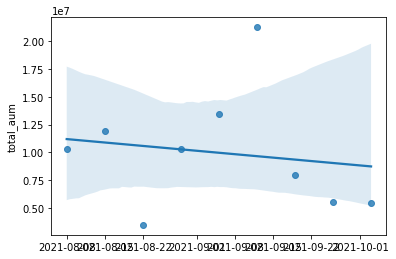

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(weekly_campuran_aum['date'])

sns.regplot(x=ax.xaxis.convert_units(weekly_campuran_aum['date']), y=weekly_campuran_aum['total_aum'])

Same like daily trend. Balance of all mutual funds are increasing, except Campuran is Decreasing

###Monthly Trend

In [ ]:
monthly_saham_aum = saham_not_0.groupby([pd.Grouper(key='year_month', freq='W')])['Saham_AUM'].mean().reset_index(name='total_aum')
monthly_pasar_aum = pasar_not_0.groupby([pd.Grouper(key='year_month', freq='W')])['Pasar_Uang_AUM'].mean().reset_index(name='total_aum')
monthly_pendapatan_aum = pendapatan_not_0.groupby([pd.Grouper(key='year_month', freq='W')])['Pendapatan_Tetap_AUM'].mean().reset_index(name='total_aum')
monthly_campuran_aum = campuran_not_0.groupby([pd.Grouper(key='year_month', freq='W')])['Campuran_AUM'].mean().reset_index(name='total_aum')

####Trend of Saham AUM (Monthly)

<Figure size 1440x864 with 0 Axes>

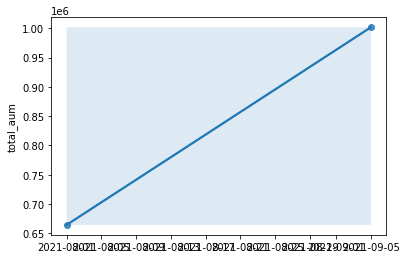

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(monthly_saham_aum['year_month'])

sns.regplot(x=ax.xaxis.convert_units(monthly_saham_aum['year_month']), y=monthly_saham_aum['total_aum'])

####Trend of Pasar Uang AUM (Monthly)

<Figure size 1440x864 with 0 Axes>

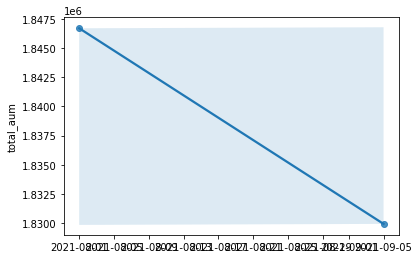

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(monthly_pasar_aum['year_month'])

sns.regplot(x=ax.xaxis.convert_units(monthly_pasar_aum['year_month']), y=monthly_pasar_aum['total_aum'])

####Trend of Pendapatan Tetap AUM (Monthly)

<Figure size 1440x864 with 0 Axes>

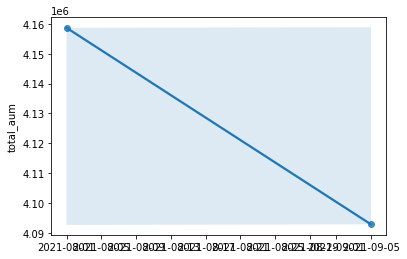

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(monthly_pendapatan_aum['year_month'])

sns.regplot(x=ax.xaxis.convert_units(monthly_pendapatan_aum['year_month']), y=monthly_pendapatan_aum['total_aum'])

####Trend of Campuran AUM (Monthly)

<Figure size 1440x864 with 0 Axes>

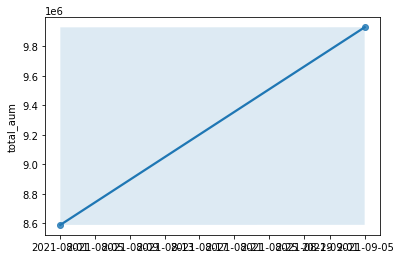

In [ ]:
fig = plt.figure(figsize=(20, 12))

f, ax = plt.subplots()

ax.xaxis.update_units(monthly_campuran_aum['year_month'])

sns.regplot(x=ax.xaxis.convert_units(monthly_campuran_aum['year_month']), y=monthly_campuran_aum['total_aum'])

1. Saham AUM in monthly trend same like the daily and weekly, increasing
2. Pasar Uang AUM in monthly opposite from daily and weekly, decreasing
3. Pendapatan Tetap AUM in monthly is opposite from daily and weekly, decreasing
4. Campuran AUM in monthly is opposite from weekly, increasing

#New Column

In [ ]:
df_data['user_age'] = df_data['user_age'].astype(int)
df_data['income_type'] = np.where(df_data['user_income_source']=='Gaji','Fixed Source','Variable Source')
df_data['generation'] = np.where(df_data['user_age']<8 ,'Generation Alpha',
                                np.where(df_data['user_age']<24, 'Generation Z' ,
                                np.where(df_data['user_age']<40, 'Generation Millennials' ,
                                np.where(df_data['user_age']<55, 'Generation X',
                                np.where(df_data['user_age']<75, 'Boomer Generation','Interwar Generation')))))
df_data['income_type'] = df_data['income_type'].astype('category')


Make new column 

1. Income Type

  If user_income_source is Gaji, then 'Fixed Source', else 'Variable Source'


2. Generation

  Source https://www12.statcan.gc.ca/census-recensement/2021/as-sa/98-200-X/2021003/98-200-X2021003-eng.cfm

#Segmentation

In [ ]:
df_cluster = df_data.copy()
dum_gender_df = pd.get_dummies(df_cluster, columns=['user_gender'], prefix=['user_gender'])
dum_occupation_df = pd.get_dummies(df_cluster, columns=['user_occupation'], prefix=['user_occupation'])
dum_income_range_df = pd.get_dummies(df_cluster, columns=['user_income_range'], prefix=['user_income_range'])
dum_income_type_df = pd.get_dummies(df_cluster, columns=['income_type'], prefix=['income_type'])
dum_generation_df = pd.get_dummies(df_cluster, columns=['generation'], prefix=['generation'])
df_cluster = df_cluster.merge(dum_gender_df)
df_cluster = df_cluster.merge(dum_occupation_df)
df_cluster = df_cluster.merge(dum_income_range_df)
df_cluster = df_cluster.merge(dum_income_type_df)
df_cluster = df_cluster.merge(dum_generation_df)
df_cluster.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 45 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   user_id                                     158811 non-null  object        
 1   date                                        158811 non-null  datetime64[ns]
 2   year_month                                  158811 non-null  datetime64[ns]
 3   Saham_AUM                                   158811 non-null  float64       
 4   Saham_invested_amount                       158811 non-null  float64       
 5   Saham_transaction_amount                    158811 non-null  float64       
 6   Pasar_Uang_AUM                              158811 non-null  float64       
 7   Pasar_Uang_invested_amount                  158811 non-null  float64       
 8   Pasar_Uang_transaction_amount               158811 non-null  float64      

In [ ]:
df_cluster.drop(['user_id','date','year_month','registration_import_datetime','weekday','user_income_source','user_age','user_gender','user_occupation','referral_code_used','generation','user_income_range','income_type'], inplace=True, axis=1)
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 32 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Saham_AUM                                   158811 non-null  float64
 1   Saham_invested_amount                       158811 non-null  float64
 2   Saham_transaction_amount                    158811 non-null  float64
 3   Pasar_Uang_AUM                              158811 non-null  float64
 4   Pasar_Uang_invested_amount                  158811 non-null  float64
 5   Pasar_Uang_transaction_amount               158811 non-null  float64
 6   Pendapatan_Tetap_AUM                        158811 non-null  float64
 7   Pendapatan_Tetap_invested_amount            158811 non-null  float64
 8   Pendapatan_Tetap_transaction_amount         158811 non-null  float64
 9   Campuran_AUM                                158811 non-null  float64
 

##Elbow Method

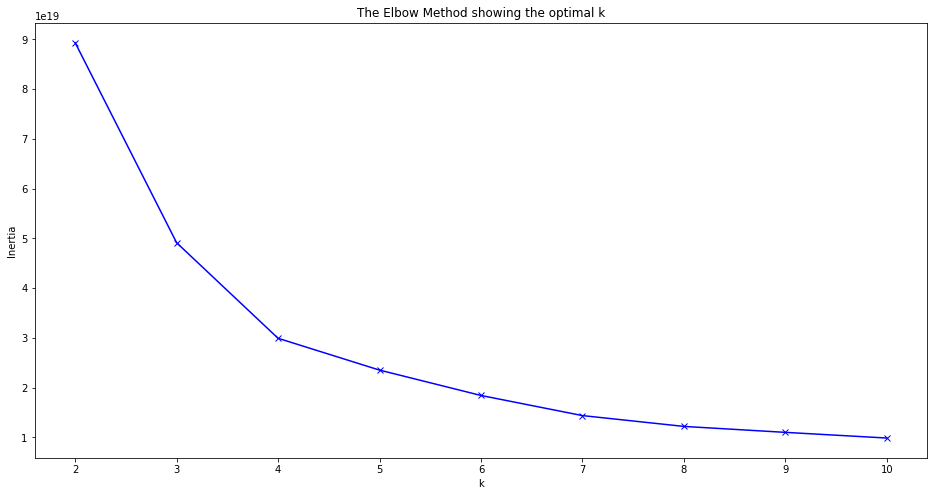

In [ ]:
distortions = []
K = range(2,11)#2,3,4,5,6,7,8,9,10
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can't use elbow method because the lower innertia was start in 8, too many segmentation

##Silhoutte Analysis

In [ ]:
!gdown https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l
from silhoutte import silhoutte_analysis

Downloading...
From: https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l
To: /content/silhoutte.py
100% 4.34k/4.34k [00:00<00:00, 4.52MB/s]


For n_clusters = 2 The average silhouette_score is : 0.9950665572630094
For n_clusters = 3 The average silhouette_score is : 0.9953422401976801
For n_clusters = 4 The average silhouette_score is : 0.990498318889238


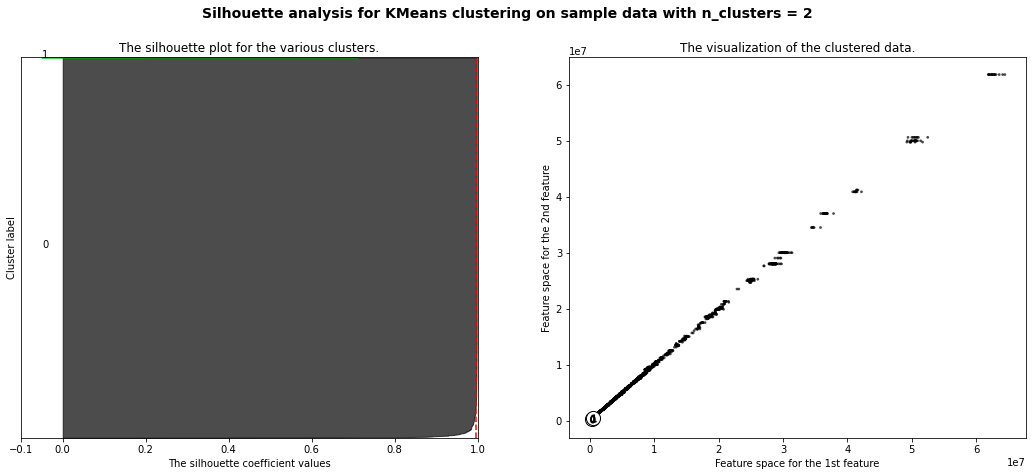

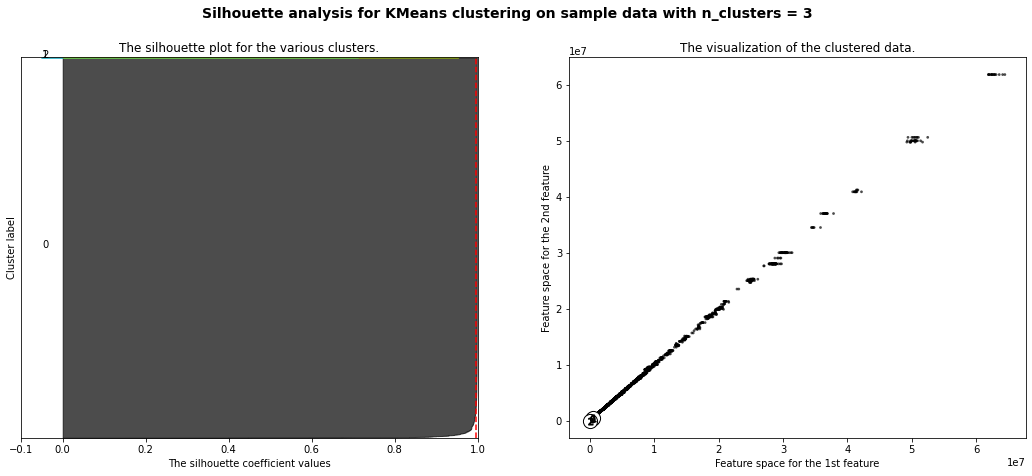

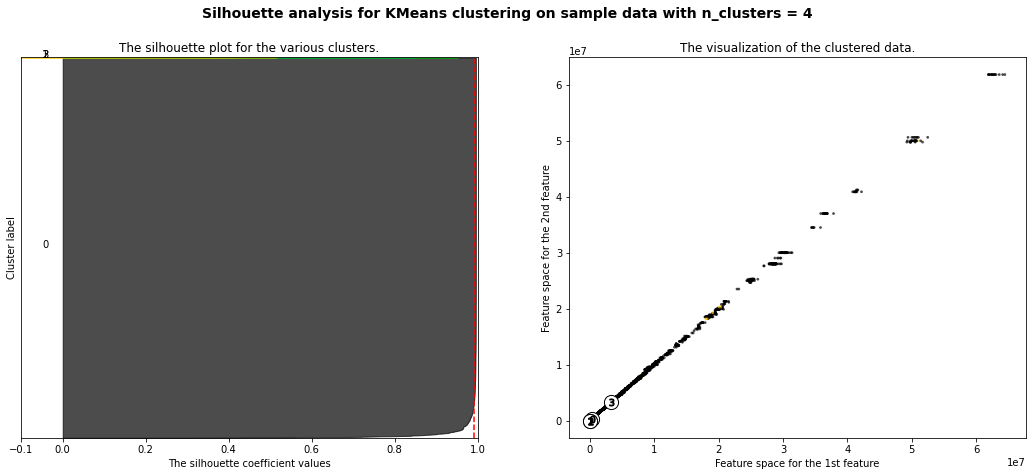

In [ ]:
silhoutte_analysis(df_cluster,[2, 3, 4])